# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim import corpora, models,similarities
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data set exploration

In [2]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [3]:
df_train

condition_label                                   medical_abstract
0                    5  Tissue changes around loose prostheses. A cani...
1                    1  Neuropeptide Y and neuron-specific enolase lev...
2                    2  Sexually transmitted diseases of the colon, re...
3                    1  Lipolytic factors associated with murine and h...
4                    3  Does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  Epirubicin at two dose levels with prednisolon...
11546                1  Four and a half year follow up of women with d...
11547                5  Safety of the transbronchial biopsy in outpati...
11548                3  Interictal spikes and hippocampal somatostatin...
11549                5  Recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [4]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: condition_label, dtype: float64

In [5]:
df_train.isnull().values.any()

False

In [6]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract))

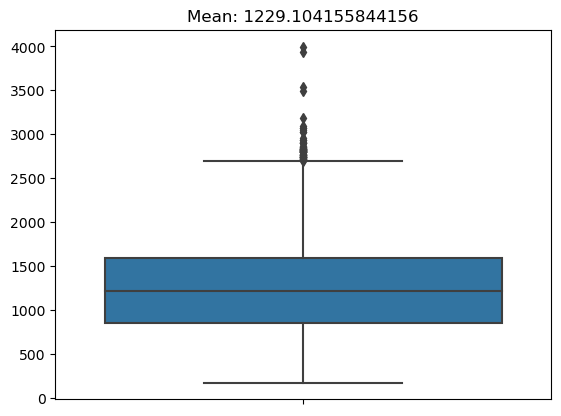

In [7]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [8]:
df_test

condition_label                                   medical_abstract
0                   3  Obstructive sleep apnea following topical orop...
1                   5  Neutrophil function and pyogenic infections in...
2                   5  A phase II study of combined methotrexate and ...
3                   1  Flow cytometric DNA analysis of parathyroid tu...
4                   4  Paraneoplastic vasculitic neuropathy: a treata...
...               ...                                                ...
2883                4  Management of aortobronchial fistula with graf...
2884                5  Tuberculous psoas muscle abscess following che...
2885                4  Clinical evaluation of high-frequency (ultraso...
2886                1  Antitumor activity of liposome-encapsulated do...
2887                4  An unusual venous anomaly of the placenta. The...

[2888 rows x 2 columns]

In [9]:
df_test["condition_label"].value_counts()/df_test.shape[0]*100

5    33.275623
1    21.918283
4    21.121884
3    13.331025
2    10.353186
Name: condition_label, dtype: float64

In [10]:
pd.concat([df_test["condition_label"], df_train["condition_label"]]).value_counts()/(df_test.shape[0]+df_train.shape[0])*100

5    33.280233
1    21.907466
4    21.131736
3    13.332872
2    10.347694
Name: condition_label, dtype: float64

In [11]:
df_test.isnull().values.any()

False

In [12]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract))

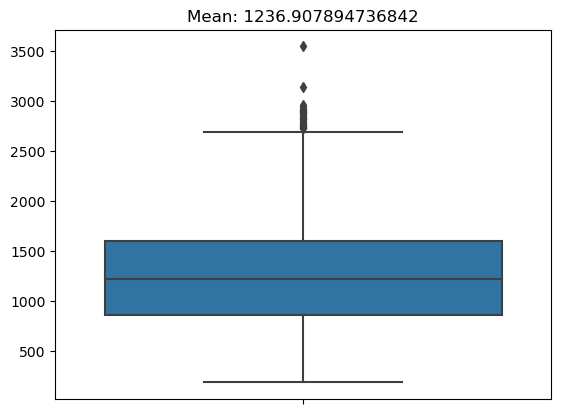

In [13]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [14]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Preprocessing 

In [309]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [310]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


In [311]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [312]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [313]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [314]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [315]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [316]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [317]:
df_test

condition_label                                   medical_abstract
0                   3  obstructive sleep apnea following topical orop...
1                   5  neutrophil function and pyogenic infections in...
2                   5  a phase ii study of combined methotrexate and ...
3                   1  flow cytometric dna analysis of parathyroid tu...
4                   4  paraneoplastic vasculitic neuropathy a treatab...
...               ...                                                ...
2883                4  management of aortobronchial fistula with graf...
2884                5  tuberculous psoas muscle abscess following che...
2885                4  clinical evaluation of highfrequency ultrasoni...
2886                1  antitumor activity of liposomeencapsulated dox...
2887                4  an unusual venous anomaly of the placenta the ...

[2888 rows x 2 columns]

## Numbers

In [318]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [319]:
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        print(text)

tissue changes around loose prostheses a canine model to investigate the effects of an antiinflammatory agent the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro the biologic response as determined by interleukin1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery the correlation between clinical roentgenographic histologic and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure a canine model permits the study of possible nonsurgical therapeutic interventions with the ultimate hope

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [320]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

In [321]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))

In [322]:
number_words_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten)\b'

In [323]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))

## Remove links

In [324]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [325]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [326]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at  dose levels with prednisolone a...
11546                1   and a half year follow up of women with dyska...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

## Stop Words, repeated characters

In [327]:
from nltk.corpus import stopwords

In [328]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['month', 'one', 'leave', 'patient','patients','study','group', 'child', 'case', 'b', 'show',
                        'disease','p','less','use','case','treatment','year','result','increase', 'effect', 'level', 'may'])

def remove_stopwords(text):
    tokenized_text = WordPunctTokenizer().tokenize(text)
    tokenized_text_without_stopwords = []
    for token in tokenized_text:
        if token.lower() not in stop_words:
            if('patient' not in token.lower() and 'patients' not in token.lower()):
                tokenized_text_without_stopwords.append(token)
    return ' '.join(tokenized_text_without_stopwords)

In [329]:
x = df_train['medical_abstract']
y = df_test['medical_abstract']
df_train['medical_abstract'] = x.apply(remove_stopwords)
df_test['medical_abstract'] = y.apply(remove_stopwords)

In [330]:
def character_repeatation(text):
    # Pattern matching for all case alphabets
    # \1   It refers to the first capturing group.
    # {2,} It means we are matching for repetition that occurs more than two times (or equal).
    # r’\1\1' → It limits all the repetition to two characters.
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted

In [331]:
x = df_train['medical_abstract']
y = df_test['medical_abstract']
df_train['medical_abstract'] = x.apply(character_repeatation)
df_test['medical_abstract'] = y.apply(character_repeatation)

## Tokenization

In [332]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [333]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [334]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy objective determi...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  
0      [tissue, changes, around, loose, prostheses, c...  
1      [neuropeptide, neuronspecific, enolase, levels...  
2      [sexually, transmitted, diseases, colon, rectu...  
3      [lipolytic, factors, associated, murine, human...  
4      [carotid, restenosis, predict, increased, risk...  
...                                                  ...  
11545  [epirubicin, dose, levels, prednisolone, advan...  
11546  [half, follow, women, dyskaryotic, cervical, s...  
11547  [safety, transbronchial, biopsy, objective, de...  
11548  [interictal, spikes, hippocampal, somatostatin...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 3 columns]

## POS Tagging

In [335]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [336]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [337]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [338]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [339]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy objective determi...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, objective, de...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...  
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...  
2      [(sexually, ADV), (transmitted, VERB), (diseas...  
3      [(lipolytic, ADJ), (factors, NOUN), (associate...  
4      [(carotid, NOUN), (restenosis, NOUN), (predict...  
...                                                  ...  
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...  
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...  
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...  
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...  
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...  

[11550 rows x 4 columns]

## Lemmatization

In [340]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [341]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [342]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy objective determi...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, objective, de...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...   
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  
0      [tissue, change, around, loose, prosthesis, ca...  
1      [neuropeptide, neuronspecific, enolase, level,...  
2      [sexually, transmit, disease, colon, rectum, a...  
3      [lipolytic, factor, associate, murine, human, ...  
4      [carotid, restenosis, predict, increase, risk,...  
...                                                  ...  
11545  [epirubicin, dose, level, prednisolone, advanc...  
11546  [half, follow, woman, dyskaryotic, cervical, s...  
11547  [safety, transbronchial, biopsy, objective, de...  
11548  [interictal, spike, hippocampal, somatostatin,...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 5 columns]

## Merge processed tokens

In [343]:
def merge(tokens):
    return " ".join(tokens)

In [344]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [345]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy objective determi...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, objective, de...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...   
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  \
0      [tissue, change, around, loose, prosthesis, ca...   
1      [neuropeptide, neuronspecific, enolase, level,...   
2      [sexually, transmit, disease, colon, rectum, a...   
3      [lipolytic, factor, associate, murine, human, ...   
4      [carotid, restenosis, predict, increase, risk,...   
...                                                  ...   
11545  [epirubicin, dose, level, prednisolone, advanc...   
11546  [half, follow, woman, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, objective, de...   
11548  [interictal, spike, hippocampal, somatostatin,...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin dose level prednisolone advanced br...  
11546  half follow woman dyskaryotic cervical smear o...  
11547  safety transbronchial biopsy objective determi...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [346]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii combined methotrexate teniposide infu...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     [obstructive, sleep, apnea, following, topical...   
1     [neutrophil, function, pyogenic, infections, b...   
2     [phase, ii, combined, methotrexate, teniposide...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, followin...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, authors, ...   

                                   medical_abstract_pos  \
0     [(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...   
1     [(neutrophil, ADJ), (function, NOUN), (pyogeni...   
2     [(phase, NOUN), (ii, NOUN), (combined, VERB), ...   
3     [(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...   
4     [(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...   
...                                                 ...   
2883  [(management, NOUN), (aortobronchial, ADJ), (f...   
2884  [(tuberculous, ADJ), (psoas, NOUN), (muscle, N...   
2885  [(clinical, ADJ), (evaluation, NOUN), (highfre...   
2886  [(antitumor, NOUN), (activity, NOUN), (liposom...   
2887  [(unusual, ADJ), (venous, ADJ), (anomaly, NOUN...   

                           medical_abstract_lemma_token  \
0     [obstructive, sleep, apnea, follow, topical, o...   
1     [neutrophil, function, pyogenic, infection, bo...   
2     [phase, ii, combine, methotrexate, teniposide,...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, follow, ...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, author, p...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Save preprocessed dataframes

In [352]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

# Document representation

In [35]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [36]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy objective determi...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'dose', 'levels', 'prednisolone...   
11546  ['half', 'follow', 'women', 'dyskaryotic', 'ce...   
11547  ['safety', 'transbronchial', 'biopsy', 'object...   
11548  ['interictal', 'spikes', 'hippocampal', 'somat...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
11545  [('epirubicin', 'NOUN'), ('dose', 'NOUN'), ('l...   
11546  [('half', 'NOUN'), ('follow', 'ADJ'), ('women'...   
11547  [('safety', 'NOUN'), ('transbronchial', 'ADJ')...   
11548  [('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...   
11549  [('recurrent', 'NOUN'), ('thoracic', 'NOUN'), ...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'dose', 'level', 'prednisolone'...   
11546  ['half', 'follow', 'woman', 'dyskaryotic', 'ce...   
11547  ['safety', 'transbronchial', 'biopsy', 'object...   
11548  ['interictal', 'spike', 'hippocampal', 'somato...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin dose level prednisolone advanced br...  
11546  half follow woman dyskaryotic cervical smear o...  
11547  safety transbronchial biopsy objective determi...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [37]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii combined methotrexate teniposide infu...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     ['obstructive', 'sleep', 'apnea', 'following',...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'combined', 'methotrexate', 't...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                   medical_abstract_pos  \
0     [('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...   
1     [('neutrophil', 'ADJ'), ('function', 'NOUN'), ...   
2     [('phase', 'NOUN'), ('ii', 'NOUN'), ('combined...   
3     [('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...   
4     [('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...   
...                                                 ...   
2883  [('management', 'NOUN'), ('aortobronchial', 'A...   
2884  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
2885  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
2886  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
2887  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                           medical_abstract_lemma_token  \
0     ['obstructive', 'sleep', 'apnea', 'follow', 't...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'combine', 'methotrexate', 'te...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Word2Vec NEW

In [38]:
abstracts = pd.concat([df_train, df_test])

In [39]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in abstracts['medical_abstract_lemma']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [358]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(300) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [359]:
df_train_vectorized

array([[-0.41838455, -0.22278406,  0.28418702, ..., -0.37202466,
        -0.01557036,  0.02241481],
       [-0.505695  ,  0.22379053,  0.36667827, ..., -0.05006508,
         0.15859844, -0.27908143],
       [-0.42088127, -0.03217411, -0.04059476, ..., -0.1927201 ,
         0.04240285, -0.11233015],
       ...,
       [-0.19343327, -0.09200264, -0.2104121 , ..., -0.09742222,
         0.27257073, -0.38924816],
       [-0.16685893,  0.25138155,  0.05867664, ..., -0.20155208,
         0.4675435 , -0.04881948],
       [-0.21007708,  0.14885913, -0.17271489, ..., -0.00485497,
         0.36321738, -0.4237783 ]], dtype=float32)

In [360]:
df_train_vectorized.shape

(11550, 100)

In [361]:
df_test_vectorized.shape

(2888, 100)

### Save vectorized dataframes

In [362]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized_w2vec.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized_w2vec.csv")

## Word2Vec OLD

In [63]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in df_train['medical_abstract_lemma']] 
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [64]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(100) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [65]:
df_train_vectorized

array([[-0.4539274 ,  0.33372137, -0.09268522, ..., -0.5912409 ,
         0.21237169,  0.03137194],
       [ 0.11663619,  0.03915917, -0.08047085, ..., -0.34138358,
         0.09468367,  0.11407002],
       [ 0.18135008,  0.074536  , -0.06864931, ..., -0.51071995,
         0.239077  , -0.12443034],
       ...,
       [ 0.02545462,  0.35122305,  0.17074893, ..., -0.29950643,
         0.08300583, -0.14653783],
       [-0.12520449,  0.10442537,  0.07804589, ..., -0.5069742 ,
         0.2026647 , -0.0283951 ],
       [ 0.14961891,  0.3157314 ,  0.11175612, ..., -0.20772097,
        -0.03838452, -0.31603304]], dtype=float32)

In [66]:
df_train_vectorized.shape

(11550, 100)

In [67]:
df_test_vectorized.shape

(2888, 100)

### Save vectorized dataframes

In [68]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized_w2vec.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized_w2vec.csv")

## SBERT

In [41]:
from sentence_transformers import SentenceTransformer

# Load the SBERT model (you can choose different pre-trained models)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example sentences
sentences = abstracts['medical_abstract_lemma'].tolist()

# Generate embeddings for the sentences
sentence_embeddings = model.encode(sentences)

# Display the embeddings
#for sentence, embedding in zip(sentences, sentence_embeddings):
    #print(f"Sentence: {sentence}")
    #print(f"Embedding shape: {embedding.shape}")
    #print(f"Embedding: {embedding}")
    #print()


In [364]:
sentence_embeddings.shape

(14438, 384)

In [365]:
df = pd.DataFrame(data=sentence_embeddings[0:11550,:])
csv_filename = "./dataset/medical_tc_train_vectorized_sbert.csv"
df.to_csv(csv_filename) 

In [366]:
df = pd.DataFrame(data=sentence_embeddings[11550:,:])
csv_filename = "./dataset/medical_tc_test_vectorized_sbert.csv"
df.to_csv(csv_filename) 

# Classification

In [ ]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized.csv", index_col = 0)

In [ ]:
df_train_vectorized.shape

In [ ]:
df_train_vectorized

# Topic modeling XXXX

In [172]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [173]:
df_total = pd.concat([df_train, df_test], ignore_index = True)

In [174]:
df_total

condition_label  \
0                    5   
1                    1   
2                    2   
3                    1   
4                    3   
...                ...   
14433                4   
14434                5   
14435                4   
14436                1   
14437                4   

                                                                                          medical_abstract  \
0      tissue changes around loose prostheses canine model investigate effects antiinflammatory agent a...   
1      neuropeptide neuronspecific enolase levels benign malignant pheochromocytomas neuronspecific eno...   
2      sexually transmitted diseases colon rectum anus challenge nineties past decades explosive growth...   
3      lipolytic factors associated murine human cancer cachexia identified lipolytic factor extracts c...   
4      carotid restenosis predict increased risk late symptoms stroke death identification carotid rest...   
...                                                                                                    ...   
14433  management aortobronchial fistula graft replacement omentopexy massive hemoptysis due recurrent ...   
14434  tuberculous psoas muscle abscess following chemoprophylaxis isoniazid human immunodeficiency vir...   
14435  clinical evaluation highfrequency ultrasonic mechanical debridement surgical calcific aortic ste...   
14436  antitumor activity liposomeencapsulated doxorubicin advanced breast cancer phase ii previous stu...   
14437  unusual venous anomaly placenta authors present unusual vascular anomaly placenta placenta large...   

                                                                                    medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'prostheses', 'canine', 'model', 'investigate', 'effect...   
1      ['neuropeptide', 'neuronspecific', 'enolase', 'levels', 'benign', 'malignant', 'pheochromocytoma...   
2      ['sexually', 'transmitted', 'diseases', 'colon', 'rectum', 'anus', 'challenge', 'nineties', 'pas...   
3      ['lipolytic', 'factors', 'associated', 'murine', 'human', 'cancer', 'cachexia', 'identified', 'l...   
4      ['carotid', 'restenosis', 'predict', 'increased', 'risk', 'late', 'symptoms', 'stroke', 'death',...   
...                                                                                                    ...   
14433  ['management', 'aortobronchial', 'fistula', 'graft', 'replacement', 'omentopexy', 'massive', 'he...   
14434  ['tuberculous', 'psoas', 'muscle', 'abscess', 'following', 'chemoprophylaxis', 'isoniazid', 'hum...   
14435  ['clinical', 'evaluation', 'highfrequency', 'ultrasonic', 'mechanical', 'debridement', 'surgical...   
14436  ['antitumor', 'activity', 'liposomeencapsulated', 'doxorubicin', 'advanced', 'breast', 'cancer',...   
14437  ['unusual', 'venous', 'anomaly', 'placenta', 'authors', 'present', 'unusual', 'vascular', 'anoma...   

                                                                                      medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('around', 'ADP'), ('loose', 'ADJ'), ('prostheses', 'N...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', 'ADJ'), ('enolase', 'NOUN'), ('levels', 'NOUN'), ('...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'), ('diseases', 'NOUN'), ('colon', 'VERB'), ('rectum...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('associated', 'VERB'), ('murine', 'ADJ'), ('human',...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ('predict', 'NOUN'), ('increased', 'VERB'), ('risk...   
...                                                                                                    ...   
14433  [('management', 'NOUN'), ('aortobronchial', 'ADJ'), ('fistula', 'NOUN'), ('graft', 'NOUN'), ('re...   
14434  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('muscle', 'NOUN'), ('abscess', 'NOUN'), ('following...   
14435  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ('highfre

In [175]:
# Compute relative frequency of values in the 'Category' column
relative_frequency = df_total['condition_label'].value_counts(normalize=True)
print(relative_frequency)

5    0.332802
1    0.219075
4    0.211317
3    0.133329
2    0.103477
Name: condition_label, dtype: float64


In [176]:
# Compute relative frequency of values in the 'Category' column
relative_frequency = df_total['condition_label'].value_counts(normalize=False)
print(relative_frequency)

5    4805
1    3163
4    3051
3    1925
2    1494
Name: condition_label, dtype: int64


In [177]:
# Function to sample 'n' rows from each group
def sample_rows(group, n):
    return group.sample(n=n, replace=True) if len(group) >= n else group

# Number of samples needed per group
samples_per_group = 1925

# Apply sampling function for each group in the 'Category' column
df_total_sampled = df_total.groupby('condition_label', group_keys=False).apply(lambda x: sample_rows(x, samples_per_group))
df_total_sampled = df_total_sampled.reset_index(drop=True)

In [178]:
df_total_sampled

condition_label  \
0                   1   
1                   1   
2                   1   
3                   1   
4                   1   
...               ...   
9189                5   
9190                5   
9191                5   
9192                5   
9193                5   

                                                                                         medical_abstract  \
0     vivo phosphorus magnetic resonance spectroscopy human uveal melanomas intraocular tumors studied...   
1     improving diagnostic accuracy cervical metastases computed tomography magnetic resonance imaging...   
2     experience photocoagulation behcets examined eyes patients uveoretinitistype lesions characteris...   
3     sphincter preservation rectal cancer local excision postoperative radiation therapy authors repo...   
4     alltrans retinoic acid acute promyelocytic leukemias ii vitro studies structurefunction relation...   
...                                                                                                   ...   
9189  kb deletion including exon xiii protein alpha gene occurs protein sdeficient families genomic dn...   
9190  blood transfusion recurrence colorectal cancer role platelet derived growth factors efforts expl...   
9191  accelerated nonmuscle contraction subarachnoid hemorrhage cerebrospinal fluid testing culture mo...   
9192  raf protein kinase required growth induced niht cells many growth factors regulate cytoplasmic r...   
9193  differential regulation human immunodeficiency viruses hivs specific regulatory element hiv resp...   

                                                                                   medical_abstract_token  \
0     ['vivo', 'phosphorus', 'magnetic', 'resonance', 'spectroscopy', 'human', 'uveal', 'melanomas', '...   
1     ['improving', 'diagnostic', 'accuracy', 'cervical', 'metastases', 'computed', 'tomography', 'mag...   
2     ['experience', 'photocoagulation', 'behcets', 'examined', 'eyes', 'patients', 'uveoretinitistype...   
3     ['sphincter', 'preservation', 'rectal', 'cancer', 'local', 'excision', 'postoperative', 'radiati...   
4     ['alltrans', 'retinoic', 'acid', 'acute', 'promyelocytic', 'leukemias', 'ii', 'vitro', 'studies'...   
...                                                                                                   ...   
9189  ['kb', 'deletion', 'including', 'exon', 'xiii', 'protein', 'alpha', 'gene', 'occurs', 'protein',...   
9190  ['blood', 'transfusion', 'recurrence', 'colorectal', 'cancer', 'role', 'platelet', 'derived', 'g...   
9191  ['accelerated', 'nonmuscle', 'contraction', 'subarachnoid', 'hemorrhage', 'cerebrospinal', 'flui...   
9192  ['raf', 'protein', 'kinase', 'required', 'growth', 'induced', 'niht', 'cells', 'many', 'growth',...   
9193  ['differential', 'regulation', 'human', 'immunodeficiency', 'viruses', 'hivs', 'specific', 'regu...   

                                                                                     medical_abstract_pos  \
0     [('vivo', 'NOUN'), ('phosphorus', 'NOUN'), ('magnetic', 'ADJ'), ('resonance', 'NOUN'), ('spectro...   
1     [('improving', 'VERB'), ('diagnostic', 'ADJ'), ('accuracy', 'NOUN'), ('cervical', 'ADJ'), ('meta...   
2     [('experience', 'NOUN'), ('photocoagulation', 'NOUN'), ('behcets', 'NOUN'), ('examined', 'VERB')...   
3     [('sphincter', 'NOUN'), ('preservation', 'NOUN'), ('rectal', 'ADJ'), ('cancer', 'NOUN'), ('local...   
4     [('alltrans', 'NOUN'), ('retinoic', 'VERB'), ('acid', 'ADJ'), ('acute', 'ADJ'), ('promyelocytic'...   
...                                                                                                   ...   
9189  [('kb', 'NOUN'), ('deletion', 'NOUN'), ('including', 'VERB'), ('exon', 'ADJ'), ('xiii', 'NOUN'),...   
9190  [('blood', 'NOUN'), ('transfusion', 'NOUN'), ('recurrence', 'NOUN'), ('colorectal', 'ADJ'), ('ca...   
9191  [('accelerated', 'VERB'), ('nonmuscle', 'ADJ'), ('contraction', 'NOUN'), ('subarachnoid', 'NOUN'... 

In [179]:
# Compute relative frequency of values in the 'Category' column
relative_frequency = df_total_sampled['condition_label'].value_counts(normalize=False)
print(relative_frequency)

1    1925
3    1925
4    1925
5    1925
2    1494
Name: condition_label, dtype: int64


In [180]:
labels = df_total_sampled['condition_label']

In [181]:
# Create a DataFrame
df = pd.DataFrame(df_total_sampled['medical_abstract_lemma'])

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

# Apply text preprocessing to the DataFrame
df['processed_text'] = df_total_sampled['medical_abstract_lemma'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['processed_text'])
#dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df['processed_text']]

## LSA

In [182]:
# Run LSA (Latent Semantic Analysis)
num_topics = 5 # Define the number of topics
lsa_model = models.LsiModel(corpus, num_topics=num_topics, id2word=dictionary)

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(lsa_model.show_topic(topic_id))

Topic 1:
[('patient', 0.8272072627493167), ('cell', 0.0852747796517781), ('year', 0.07982890321631701), ('tumor', 0.07604333708649424), ('result', 0.07361697911929319), ('rate', 0.07230771221586917), ('mean', 0.06896798624853546), ('control', 0.06839712655128063), ('therapy', 0.0682268495165592), ('clinical', 0.06662757380468733)]
Topic 2:
[('cell', 0.5869040766565436), ('patient', -0.3917619651700471), ('tumor', 0.22180585327808836), ('blood', 0.1504974877162357), ('rat', 0.13691751137960945), ('human', 0.11716184662216057), ('effect', 0.11143099236166452), ('level', 0.10505526791426624), ('may', 0.09252429186417037), ('pressure', 0.09011749219092655)]
Topic 3:
[('cell', -0.4150397687749612), ('tumor', -0.2757700411570932), ('pressure', 0.2599520680789538), ('blood', 0.24266496145429844), ('coronary', 0.20985134889615756), ('patient', -0.20912512427392918), ('artery', 0.1663371939294147), ('ventricular', 0.14821429788222654), ('rat', 0.14580657659695667), ('heart', 0.12986864708344795

In [183]:
# Evaluate coherence score
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model=lsa_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4370115190449001


In [184]:
doc_topic_matrix = lsa_model[corpus]
assignedTopics = []
for assigned_topics in list(doc_topic_matrix):
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [185]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{1: 0.1726401703335699, 2: 0.19517388218594747, 3: 0.22125621007806956, 4: 0.2017388218594748, 5: 0.20919091554293825}
******* TOPIC 1
{1: 0.3118840579710145, 2: 0.14144927536231883, 3: 0.2144927536231884, 4: 0.0910144927536232, 5: 0.24115942028985507}
******* TOPIC 2
{1: 0.004379562043795621, 2: 0.052554744525547446, 3: 0.15328467153284672, 4: 0.6058394160583942, 5: 0.18394160583941604}
******* TOPIC 3
{1: 0.4658018867924528, 2: 0.12853773584905662, 3: 0.1945754716981132, 4: 0.049528301886792456, 5: 0.1615566037735849}
******* TOPIC 4
{1: 0.05333333333333334, 2: 0.016666666666666666, 3: 0.12666666666666668, 4: 0.58, 5: 0.22333333333333333}


In [186]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{3: 0.2051948051948052, 0: 0.5054545454545455, 1: 0.2794805194805195, 4: 0.008311688311688312, 2: 0.0015584415584415584}
******* LABEL 2
{0: 0.7362784471218207, 1: 0.16331994645247658, 2: 0.024096385542168676, 3: 0.07295850066934405, 4: 0.0033467202141900937}
******* LABEL 3
{0: 0.6477922077922078, 3: 0.08571428571428572, 4: 0.019740259740259742, 2: 0.05454545454545454, 1: 0.19220779220779222}
******* LABEL 4
{0: 0.5906493506493506, 4: 0.0903896103896104, 2: 0.21558441558441557, 1: 0.08155844155844155, 3: 0.02181818181818182}
******* LABEL 5
{0: 0.6124675324675325, 1: 0.2161038961038961, 2: 0.06545454545454546, 3: 0.07116883116883117, 4: 0.034805194805194804}


In [187]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

## pLSA

In [189]:
# Create a DataFrame
df = pd.DataFrame(df_total_sampled['medical_abstract_lemma'])


# Apply text preprocessing to the DataFrame
df['processed_text'] = df_total_sampled['medical_abstract_lemma'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['processed_text'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df['processed_text']]

# Run pLSA (Latent Semantic Analysis)
num_topics = 5 # Define the number of topics
plsa_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, alpha='auto', eta='auto')

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(plsa_model.show_topic(topic_id))

Topic 1:
[('cell', 0.026963305), ('human', 0.008572699), ('tumor', 0.0067316764), ('protein', 0.006441402), ('antibody', 0.0058268853), ('gene', 0.005689357), ('level', 0.005609002), ('serum', 0.0053605954), ('may', 0.004953193), ('normal', 0.0049406886)]
Topic 2:
[('artery', 0.008791182), ('coronary', 0.0076145506), ('use', 0.0055893273), ('result', 0.0054979296), ('complication', 0.0050584343), ('pain', 0.0049690586), ('infarction', 0.004566861), ('clinical', 0.004494222), ('surgery', 0.004413005), ('may', 0.004314516)]
Topic 3:
[('age', 0.013418972), ('risk', 0.012488173), ('rate', 0.010149253), ('year', 0.009877347), ('child', 0.008428317), ('therapy', 0.008169408), ('per', 0.007671898), ('factor', 0.006920917), ('survival', 0.0069128214), ('woman', 0.0067015295)]
Topic 4:
[('pressure', 0.012817908), ('blood', 0.012590859), ('effect', 0.008845), ('rat', 0.00862053), ('ventricular', 0.008568589), ('control', 0.007923111), ('heart', 0.0077280803), ('increase', 0.0076755034), ('mean',

In [190]:
# Evaluate coherence score
coherence_model = CoherenceModel(model=plsa_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4956785386635266


In [191]:
# Get the topics' term distributions
topics = [plsa_model.get_topic_terms(topic_id) for topic_id in range(num_topics)]

# Calculate diversity (cosine similarity)
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

topic_combinations = combinations(topics, 2)
diversity_scores = []

for pair in topic_combinations:
    term_ids1, term_scores1 = zip(*pair[0])
    term_ids2, term_scores2 = zip(*pair[1])

    # Convert topic term distributions to vectors
    vec1 = np.zeros(len(dictionary))
    vec2 = np.zeros(len(dictionary))

    for idx, score in zip(term_ids1, term_scores1):
        vec1[idx] = score

    for idx, score in zip(term_ids2, term_scores2):
        vec2[idx] = score

    # Calculate cosine similarity
    similarity_score = cosine_similarity(vec1, vec2)
    diversity_scores.append(similarity_score)

average_diversity = sum(diversity_scores) / len(diversity_scores)
print(f"Average Topic Diversity (Cosine Similarity): {average_diversity}")

Average Topic Diversity (Cosine Similarity): 0.018185902456880825


In [192]:
def format_topics_sentences(texts, plsa_model=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(plsa_model[corpus]):
        row = row_list[0] if plsa_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = plsa_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(df['processed_text'], plsa_model=plsa_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               4              0.4380   
1            1               4              0.9580   
2            2               1              0.9349   
3            3               4              0.7725   
4            4               0              0.8699   
5            5               0              0.5827   
6            6               0              0.4409   
7            7               0              0.9944   
8            8               4              0.9028   
9            9               0              0.7909   

                                                                                 Keywords  \
0  case, report, tumor, diagnosis, syndrome, lesion, clinical, present, carcinoma, cancer   
1  case, report, tumor, diagnosis, syndrome, lesion, clinical, present, carcinoma, cancer   
2   artery, coronary, use, result, complication, pain, infarction, clinical, surgery, may   
3  case, report, tumor, diagnosis, syndrome, lesion, clinical, present, carcinoma, cancer   
4                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   
5                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   
6                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   
7                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   
8  case, report, tumor, diagnosis, syndrome, lesion, clinical, present, carcinoma, cancer   
9                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   

                                                                                                  Text  
0  [vivo, phosphorus, magnetic, resonance, spectroscopy, human, uveal, melanoma, intraocular, tumor...  
1  [improve, diagnostic, accuracy, cervical, metastasis, compute, tomography, magnetic, resonance, ...  
2  [experience, photocoagulation, behcets, examine, eye, patient, uveoretinitistype, lesion, charac...  
3  [sphincter, preservation, rectal, cancer, local, excision, postoperative, radiation, therapy, au...  
4  [alltrans, retinoic, acid, acute, promyelocytic, leukemia, ii, vitro, study, structurefunction, ...  
5  [monoclonal, antibody, benign, breast, lesion, suggest, monoclonal, antibody, may, useful, diagn...  
6  [prostate, specific, antigen, patient, clinical, stage, c, prostate, cancer, relation, lymph, no...  
7  [translocation, breakpoint, acute, promyelocytic, leukemia, lie, within, retinoic, acid, recepto...  
8  [microdochectomy, discharge, single, lactiferous, duct, microdochectomy, persistent, discharge, ...  
9  [basic, study, new, material, induce, antitumor, immune, cell, recently, adoptive, immunotherapy...

In [193]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9969   
1          1              0.9978   
2          2              0.9965   
3          3              0.9975   
4          4              0.9967   

                                                                                 Keywords  \
0                  cell, human, tumor, protein, antibody, gene, level, serum, may, normal   
1   artery, coronary, use, result, complication, pain, infarction, clinical, surgery, may   
2                     age, risk, rate, year, child, therapy, per, factor, survival, woman   
3         pressure, blood, effect, rat, ventricular, control, heart, increase, mean, flow   
4  case, report, tumor, diagnosis, syndrome, lesion, clinical, present, carcinoma, cancer   

                                                                                   Representative Text  
0  [insulinlike, growth, factor, mitogenic, human, keratinocytes, squamous, cell, carcinoma, normal...  
1  [acute, coronary, artery, occlusion, percutaneous, transluminal, coronary, angioplasty, frequenc...  
2  [adverse, mortality, experience, southwestern, american, indian, community, overall, death, rate...  
3  [load, dependence, leave, ventricular, diastolic, pressurevolume, relation, shortterm, coronary,...  
4  [prospective, magnetic, resonance, image, lymphoma, stag, prospective, magnetic, resonance, imag...

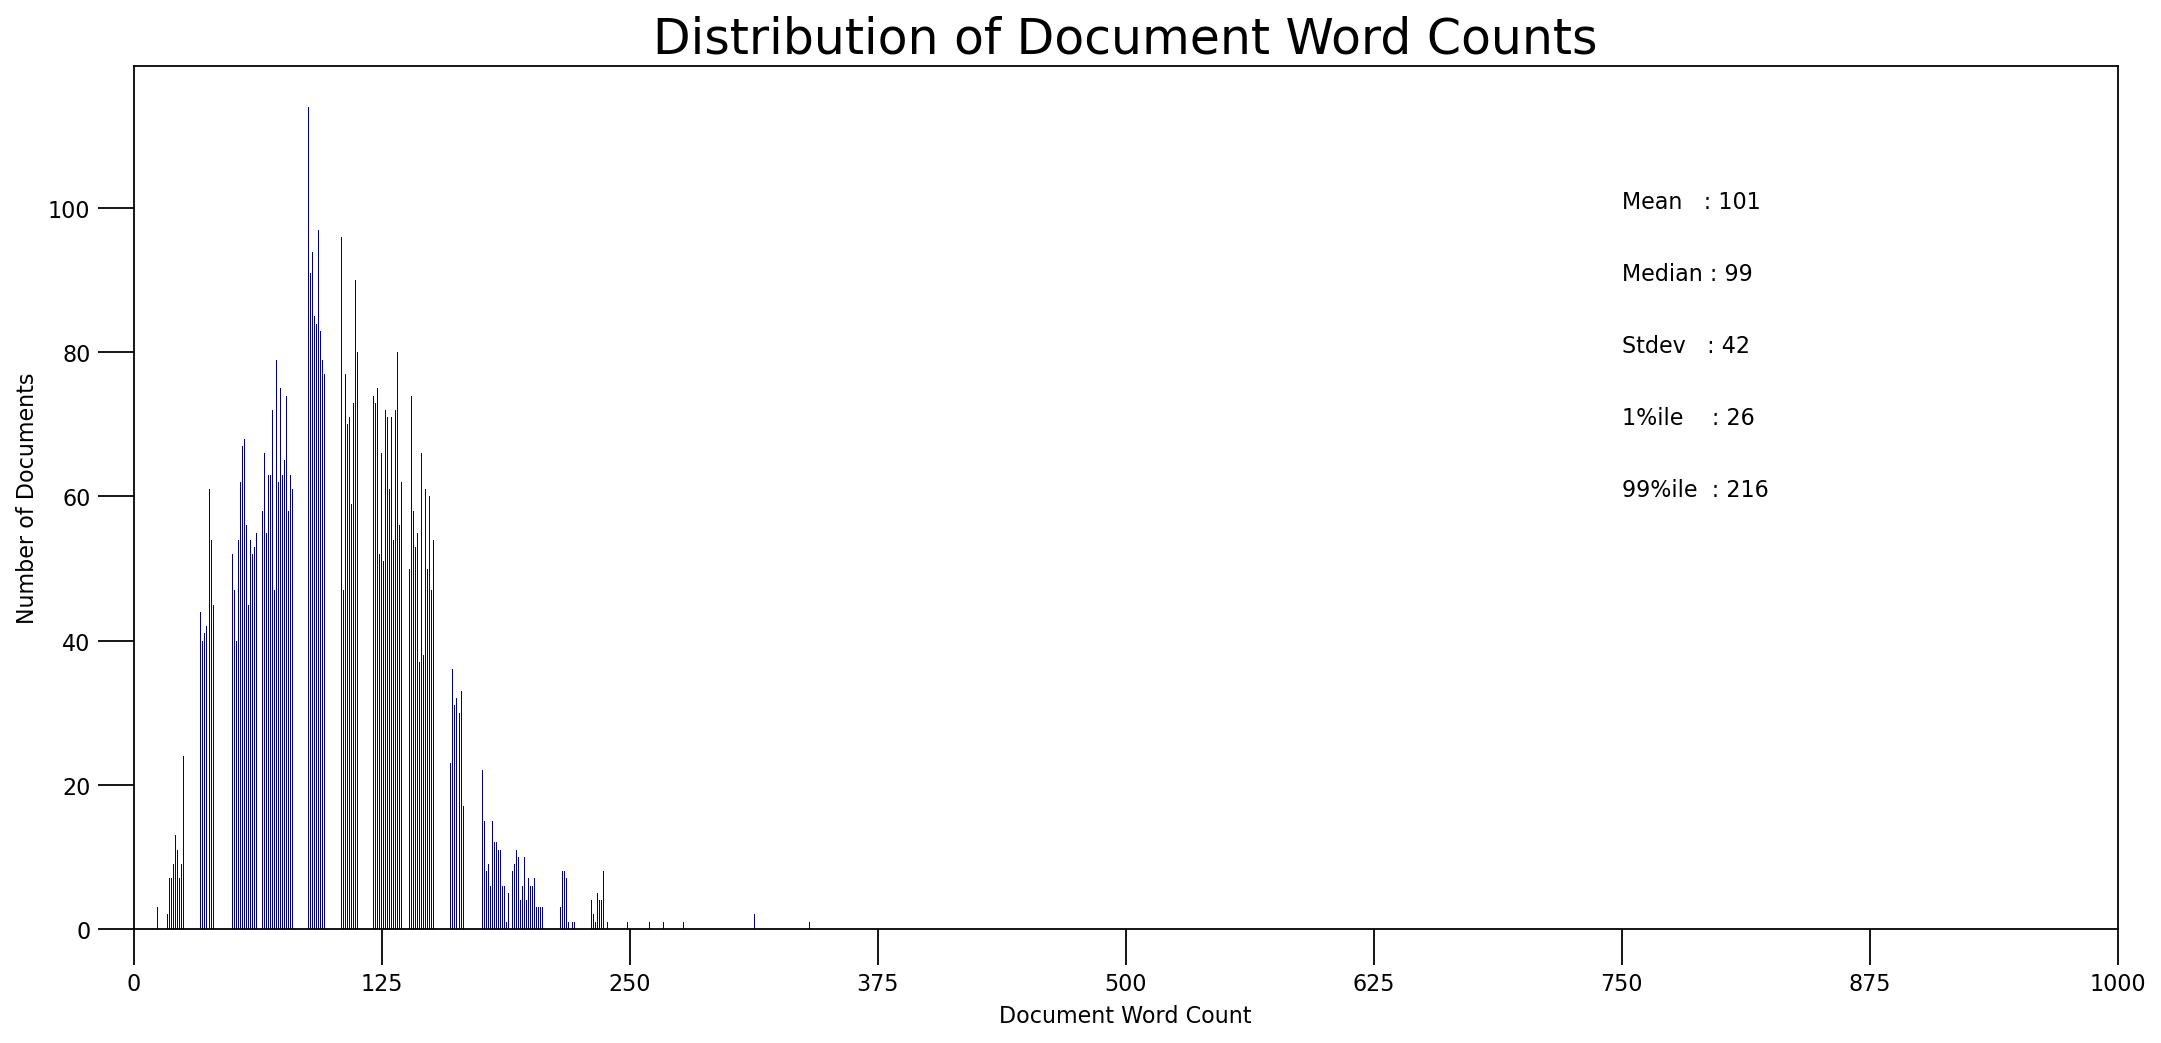

In [194]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

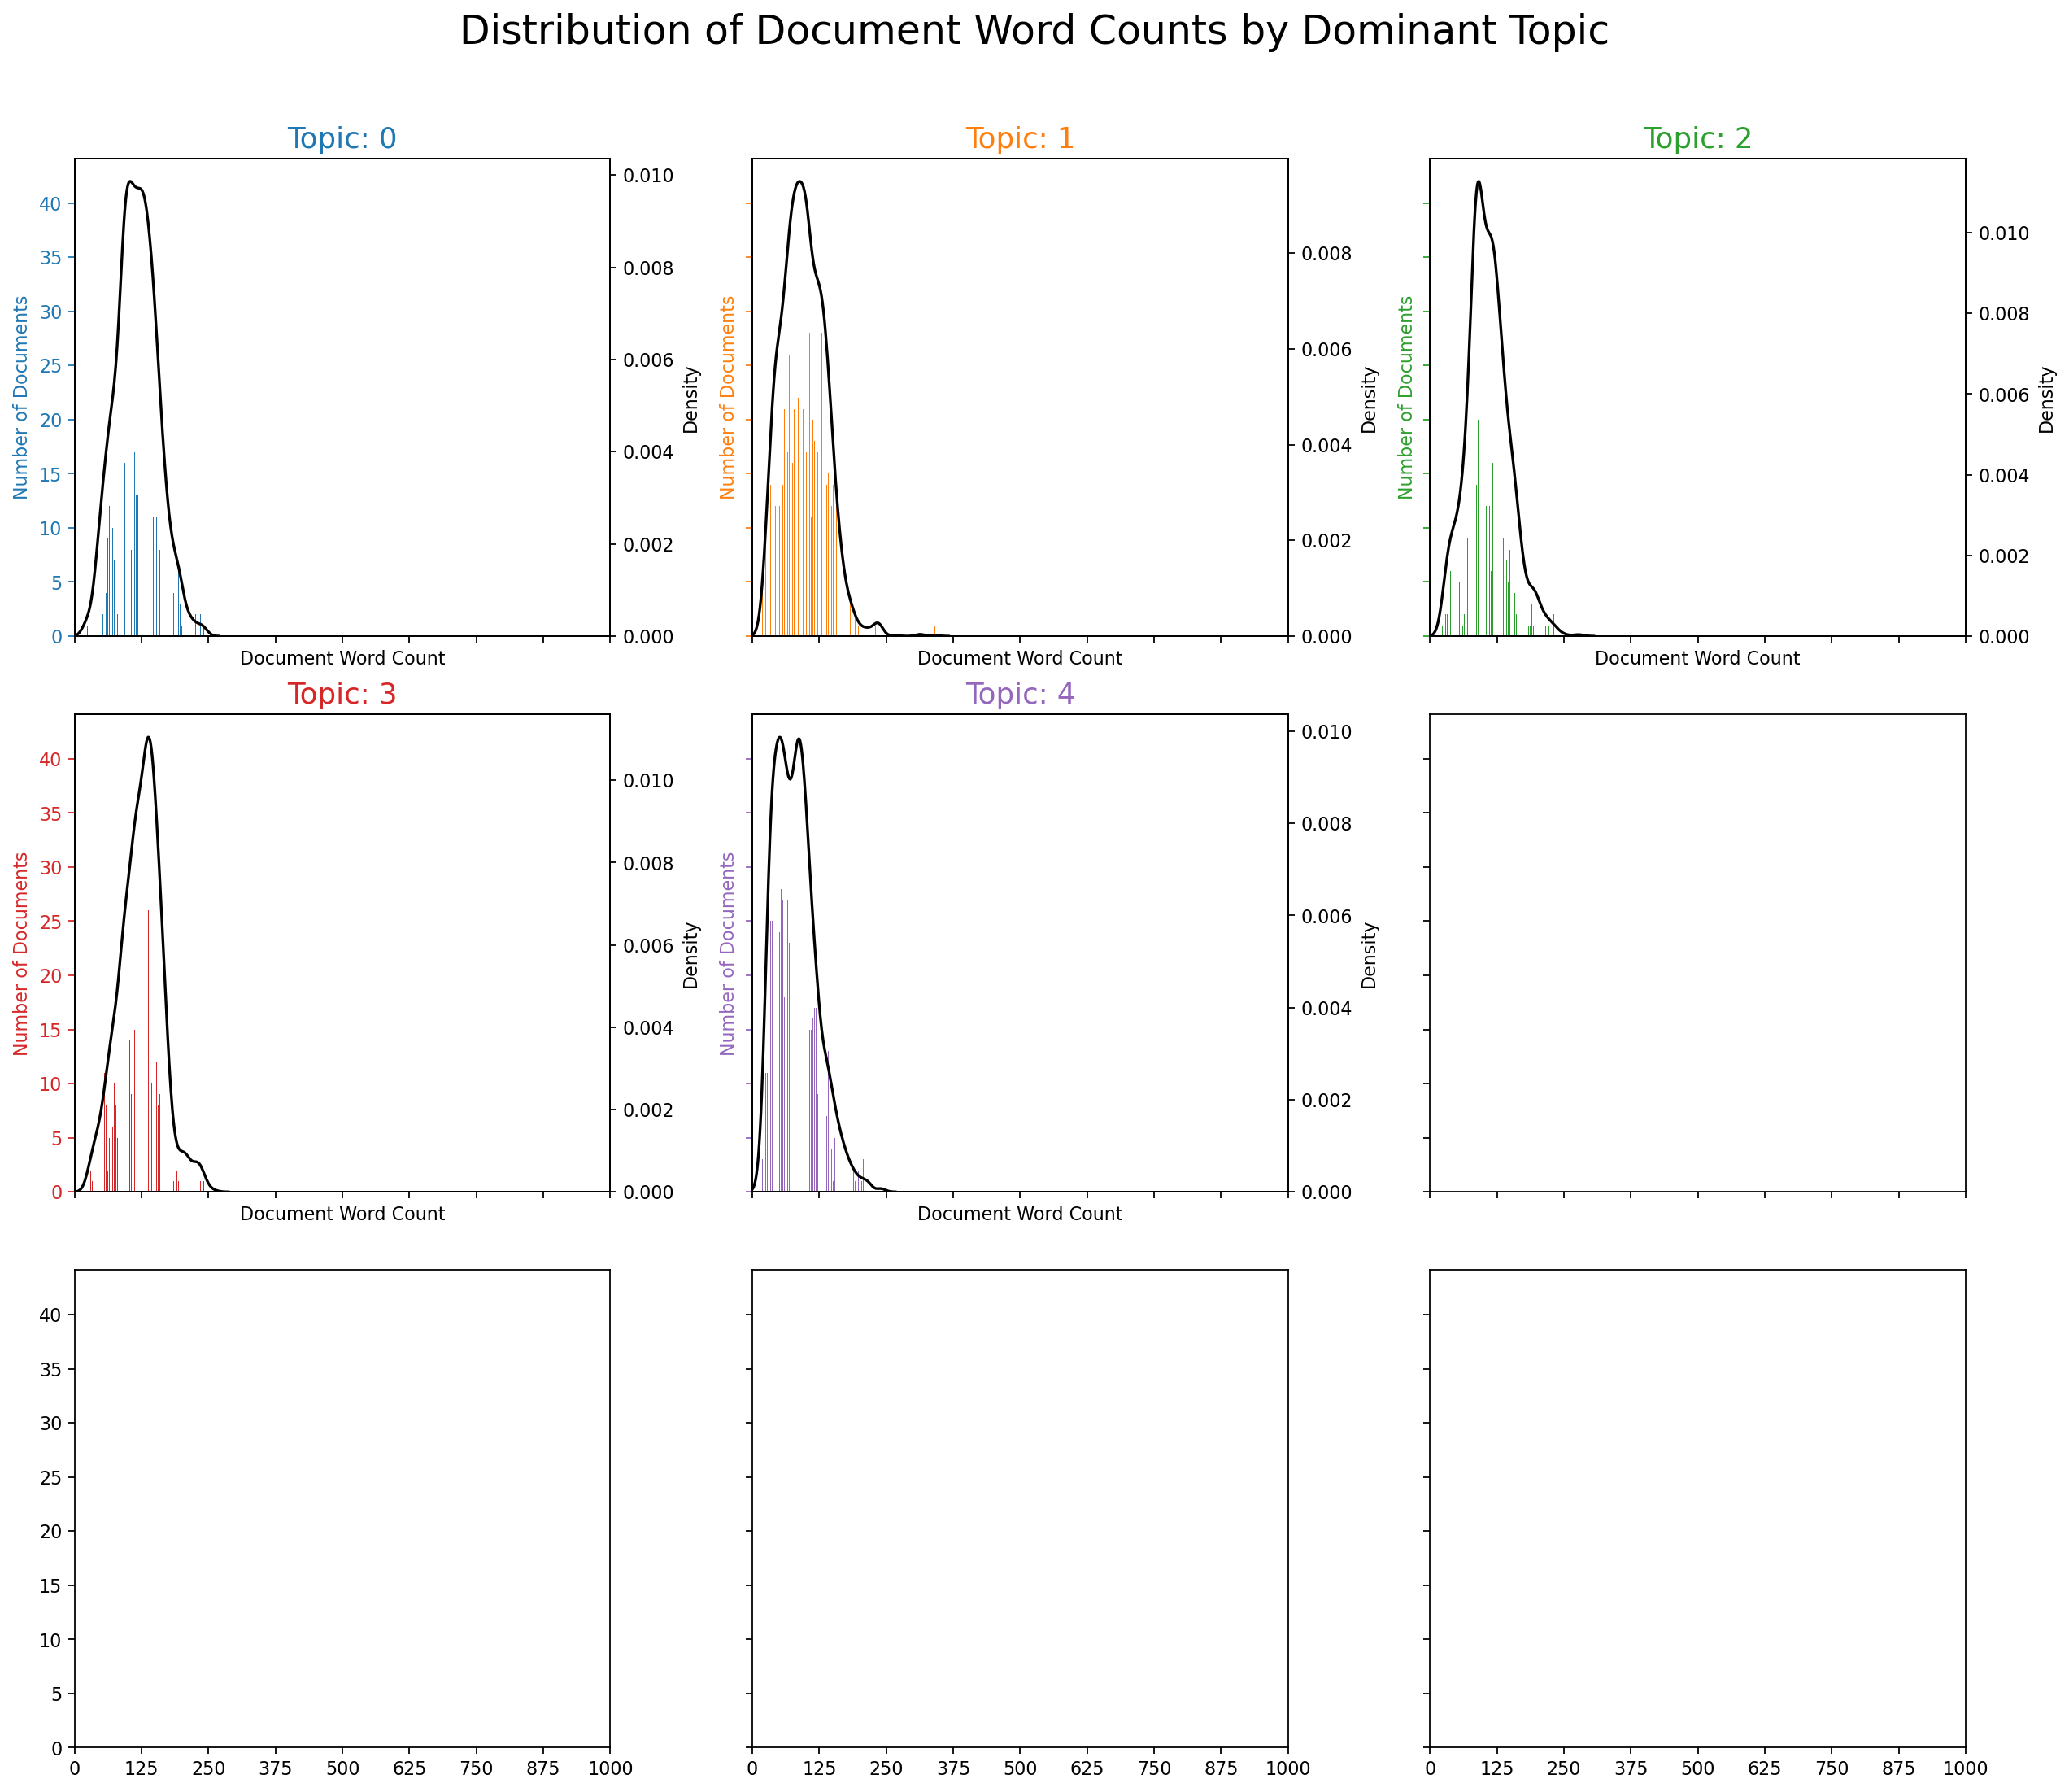

In [195]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i <=4):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

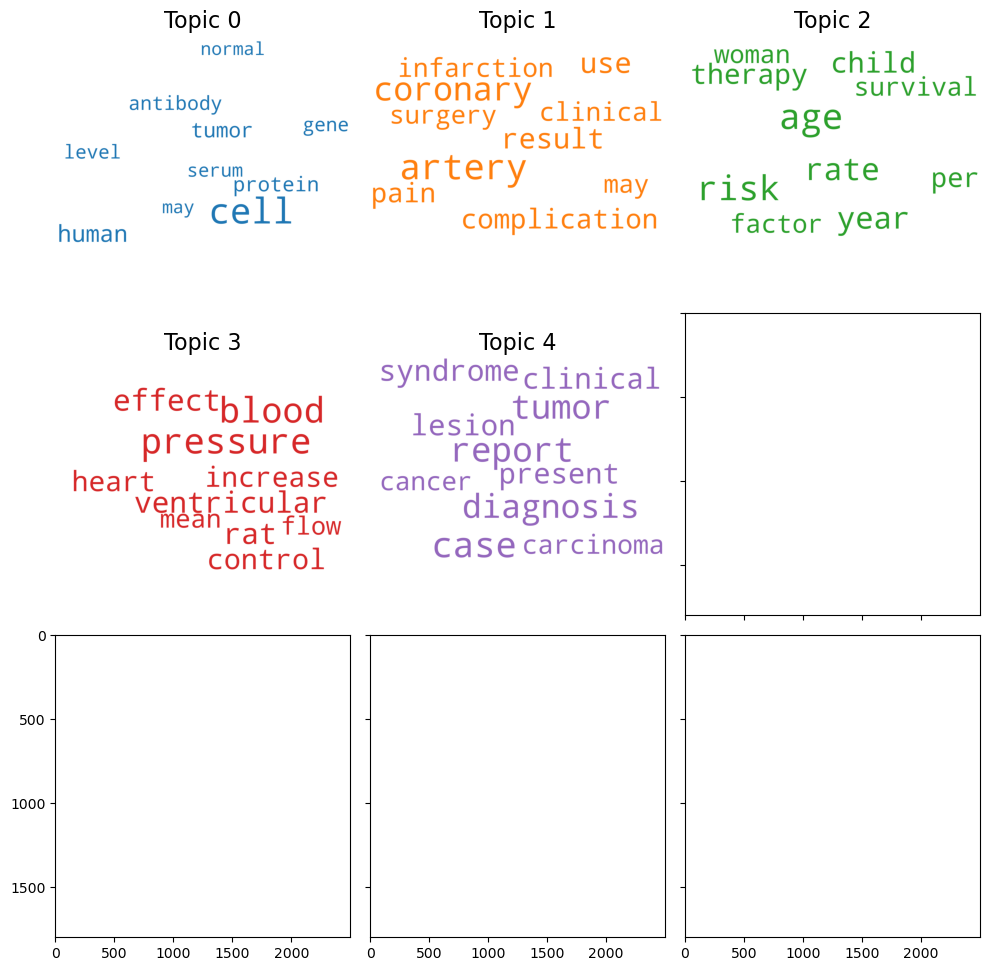

In [196]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = plsa_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i<=4):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

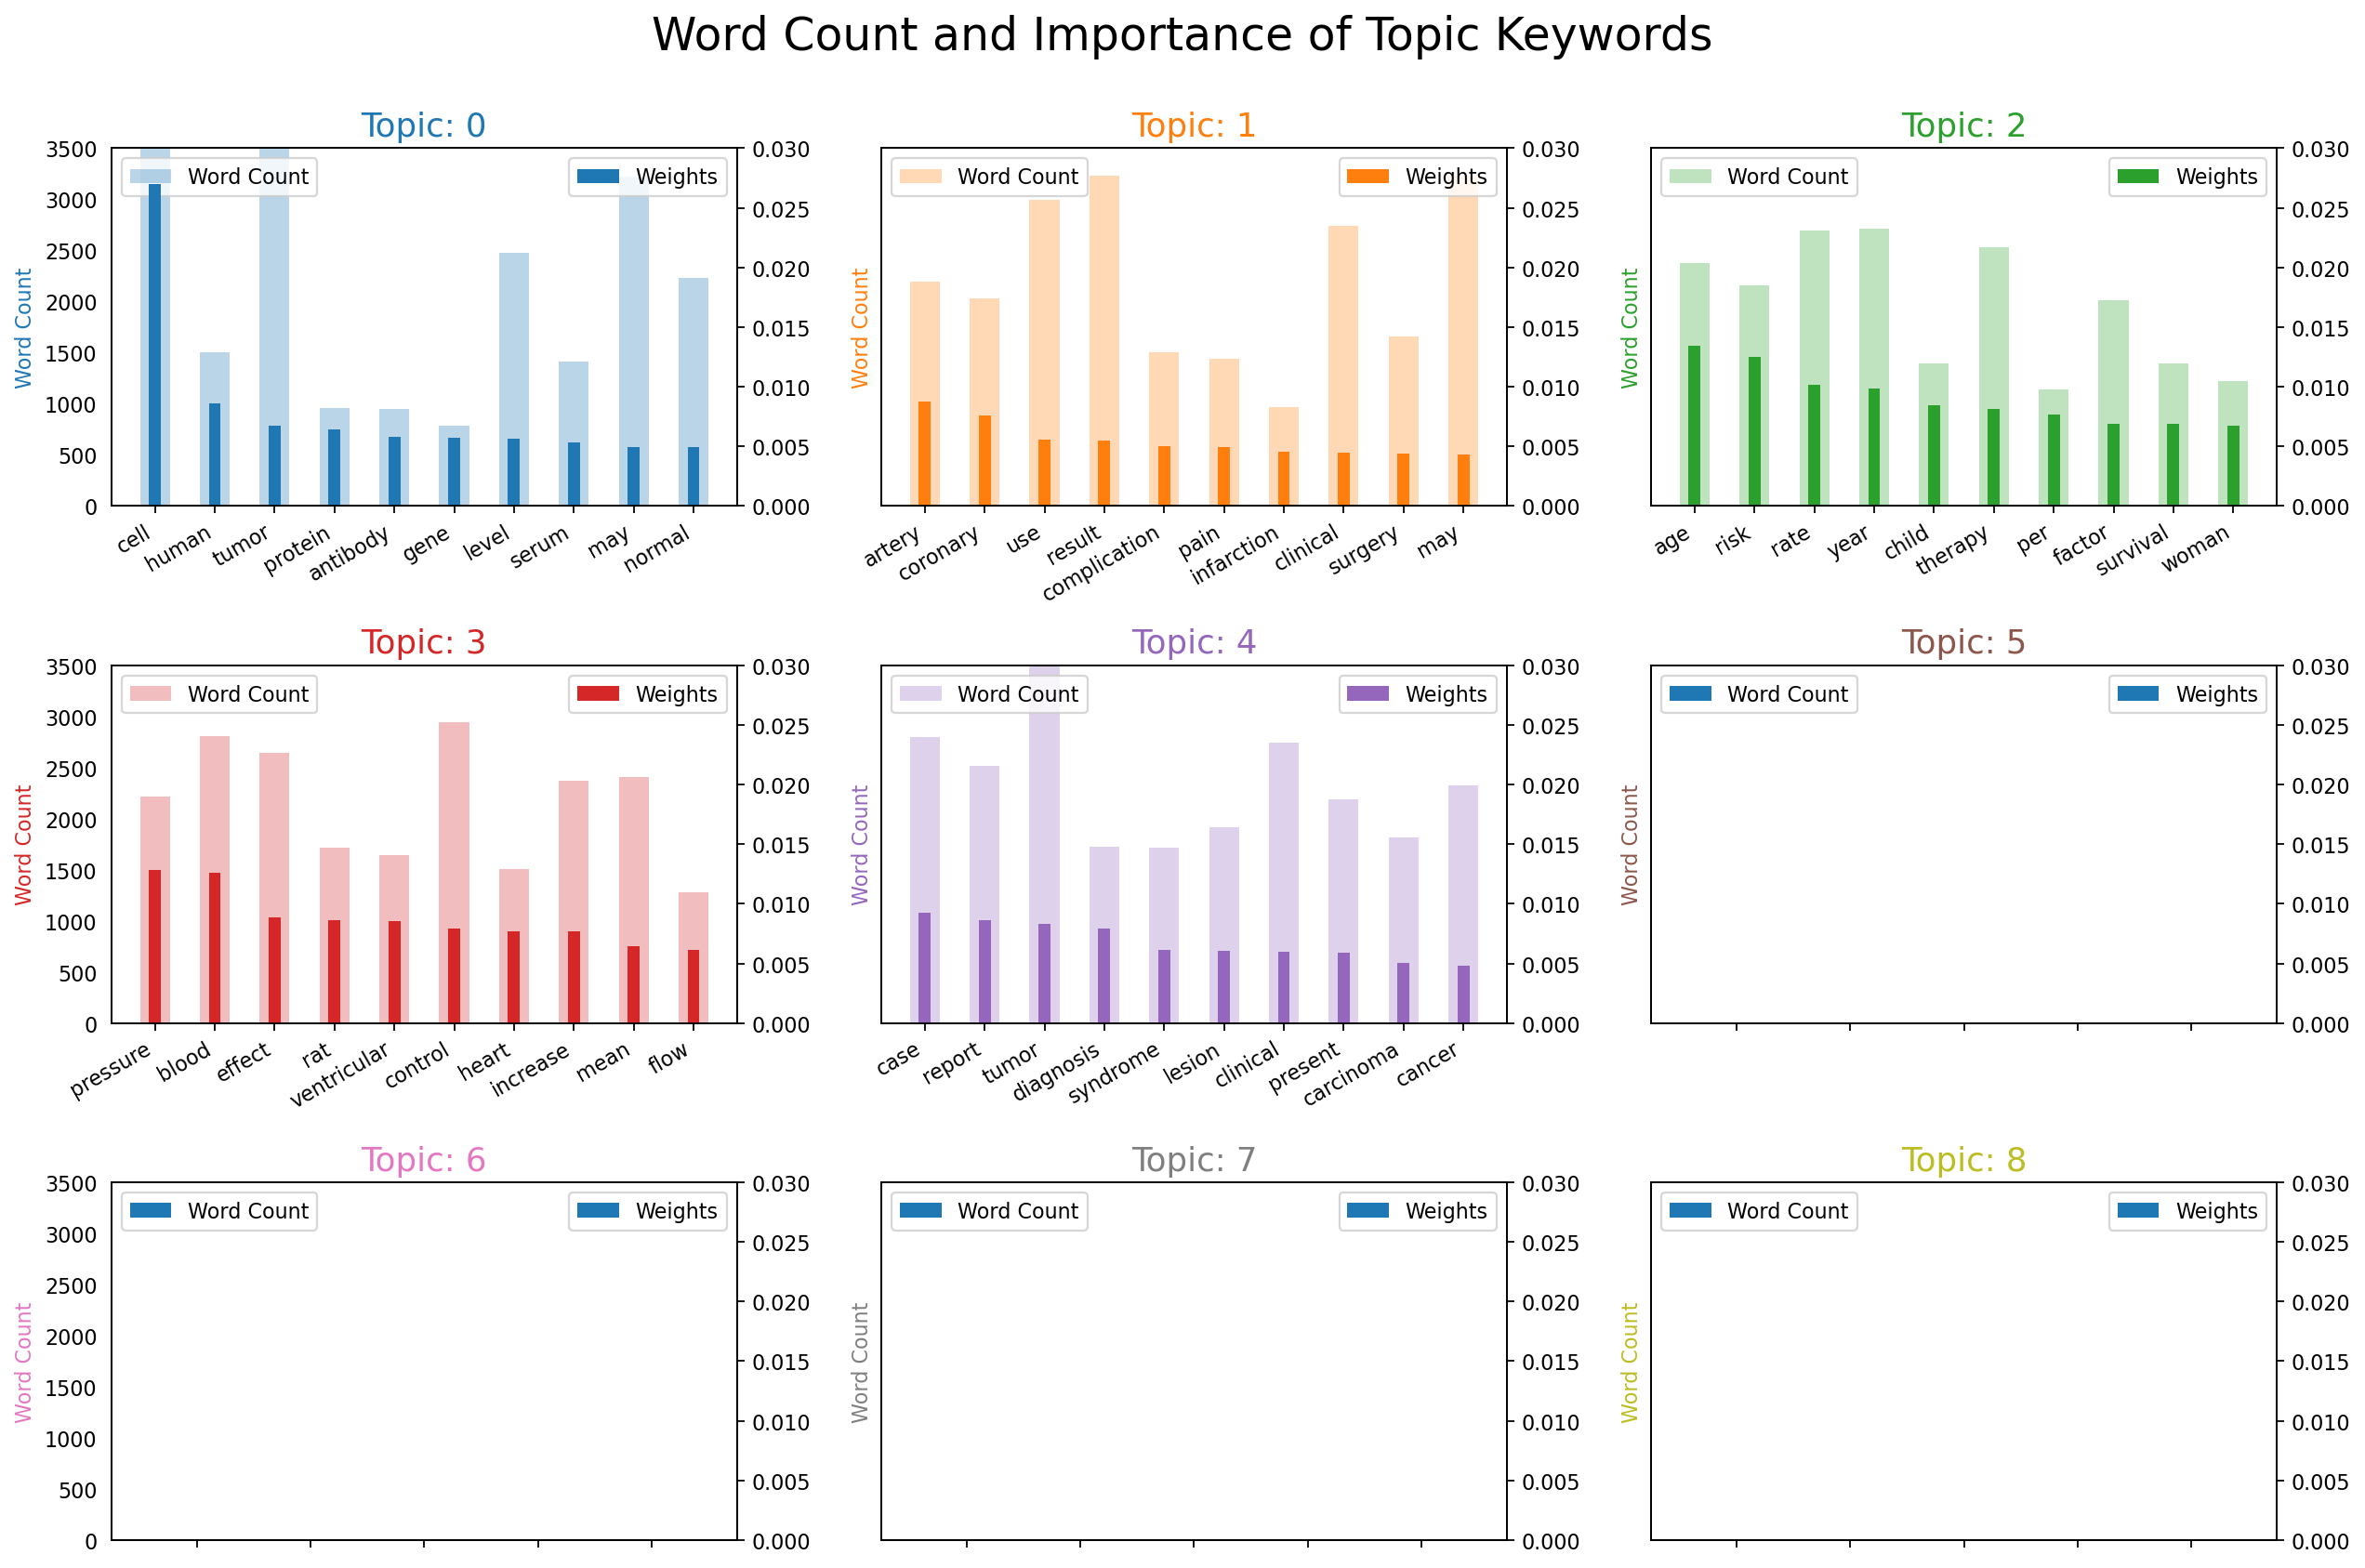

In [197]:
from collections import Counter
topics = plsa_model.show_topics(formatted=False)
data_flat = [w for w_list in df['processed_text'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [198]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
for doc_topics in plsa_model.get_document_topics(corpus):
    topic_weights.append([weight for topic_id, weight in doc_topics])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9067 samples in 0.005s...
[t-SNE] Computed neighbors for 9067 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9067
[t-SNE] Computed conditional probabilities for sample 2000 / 9067
[t-SNE] Computed conditional probabilities for sample 3000 / 9067
[t-SNE] Computed conditional probabilities for sample 4000 / 9067
[t-SNE] Computed conditional probabilities for sample 5000 / 9067
[t-SNE] Computed conditional probabilities for sample 6000 / 9067
[t-SNE] Computed conditional probabilities for sample 7000 / 9067
[t-SNE] Computed conditional probabilities for sample 8000 / 9067
[t-SNE] Computed conditional probabilities for sample 9000 / 9067
[t-SNE] Computed conditional probabilities for sample 9067 / 9067
[t-SNE] Mean sigma: 0.000212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.273163
[t-SNE] KL divergence after 1000 iterations: 0.670195


In [199]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} pLSA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [200]:
assignedTopics = []
for document in corpus:
    assigned_topics = plsa_model.get_document_topics(document)
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [201]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{1: 0.38892466194462333, 2: 0.19188667095943335, 3: 0.1493882807469414, 4: 0.0463618802318094, 5: 0.22343850611719254}
******* TOPIC 1
{1: 0.035145075602778915, 2: 0.06702084184715978, 3: 0.36371066612178177, 4: 0.2991418062934205, 5: 0.23498161013485902}
******* TOPIC 2
{1: 0.2333948339483395, 2: 0.24169741697416974, 3: 0.13191881918819187, 4: 0.16236162361623616, 5: 0.23062730627306274}
******* TOPIC 3
{1: 0.02611683848797251, 2: 0.11202749140893471, 3: 0.15120274914089346, 4: 0.5353951890034364, 5: 0.17525773195876287}
******* TOPIC 4
{1: 0.35555555555555557, 2: 0.22862523540489643, 3: 0.1657250470809793, 4: 0.06252354048964219, 5: 0.18757062146892656}


In [202]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{4: 0.4903896103896104, 1: 0.044675324675324674, 0: 0.31376623376623375, 2: 0.13142857142857142, 3: 0.019740259740259742}
******* LABEL 2
{4: 0.4062918340026774, 3: 0.10910307898259705, 2: 0.1753681392235609, 0: 0.1994645247657296, 1: 0.10977242302543508}
******* LABEL 3
{3: 0.11428571428571428, 2: 0.07428571428571429, 0: 0.12051948051948053, 1: 0.4623376623376623, 4: 0.22857142857142856}
******* LABEL 4
{1: 0.38025974025974024, 3: 0.4046753246753247, 4: 0.08623376623376623, 2: 0.09142857142857143, 0: 0.0374025974025974}
******* LABEL 5
{1: 0.2987012987012987, 0: 0.18025974025974026, 4: 0.2587012987012987, 3: 0.13246753246753246, 2: 0.12987012987012986}


In [203]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

## LDA

In [204]:
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(lda_model.show_topic(topic_id))

Topic 1:
[('artery', 0.01386723), ('coronary', 0.012291943), ('ventricular', 0.010561285), ('leave', 0.008278193), ('myocardial', 0.007607504), ('cardiac', 0.0070496625), ('aortic', 0.005504389), ('infarction', 0.005297666), ('ischemia', 0.0051490176), ('flow', 0.005038383)]
Topic 2:
[('case', 0.008653546), ('report', 0.0074318047), ('complication', 0.006583992), ('surgical', 0.006476241), ('tumor', 0.0063974317), ('month', 0.00636855), ('year', 0.006185794), ('surgery', 0.006024366), ('lesion', 0.005562569), ('present', 0.004993269)]
Topic 3:
[('risk', 0.010913661), ('age', 0.009539079), ('factor', 0.007103121), ('clinical', 0.0063796514), ('year', 0.0063149533), ('woman', 0.0052979556), ('child', 0.005297944), ('among', 0.0049060713), ('rate', 0.0046469173), ('mortality', 0.0046322616)]
Topic 4:
[('cell', 0.028036885), ('human', 0.008755369), ('tumor', 0.007637721), ('protein', 0.006201086), ('antibody', 0.0057223695), ('gene', 0.0055872696), ('normal', 0.005131742), ('tissue', 0.005

In [205]:
# Evaluate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.48973413294861795


In [206]:
# Get the topics' term distributions
topics = [lda_model.get_topic_terms(topic_id) for topic_id in range(num_topics)]

# Calculate diversity (cosine similarity)
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

topic_combinations = combinations(topics, 2)
diversity_scores = []

for pair in topic_combinations:
    term_ids1, term_scores1 = zip(*pair[0])
    term_ids2, term_scores2 = zip(*pair[1])

    # Convert topic term distributions to vectors
    vec1 = np.zeros(len(dictionary))
    vec2 = np.zeros(len(dictionary))

    for idx, score in zip(term_ids1, term_scores1):
        vec1[idx] = score

    for idx, score in zip(term_ids2, term_scores2):
        vec2[idx] = score

    # Calculate cosine similarity
    similarity_score = cosine_similarity(vec1, vec2)
    diversity_scores.append(similarity_score)

average_diversity = sum(diversity_scores) / len(diversity_scores)
print(f"Average Topic Diversity (Cosine Similarity): {average_diversity}")

Average Topic Diversity (Cosine Similarity): 0.019180110929387168


In [207]:
def format_topics_sentences(texts, ldamodel=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(df['processed_text'], ldamodel=lda_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.4393   
1            1               1              0.9017   
2            2               1              0.8827   
3            3               1              0.9934   
4            4               3              0.8135   
5            5               3              0.7527   
6            6               3              0.4919   
7            7               3              0.9918   
8            8               1              0.7798   
9            9               3              0.7873   

                                                                             Keywords  \
0  case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
1  case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
2  case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
3  case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
4             cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   
5             cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   
6             cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   
7             cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   
8  case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
9             cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   

                                                                                                  Text  
0  [vivo, phosphorus, magnetic, resonance, spectroscopy, human, uveal, melanoma, intraocular, tumor...  
1  [improve, diagnostic, accuracy, cervical, metastasis, compute, tomography, magnetic, resonance, ...  
2  [experience, photocoagulation, behcets, examine, eye, patient, uveoretinitistype, lesion, charac...  
3  [sphincter, preservation, rectal, cancer, local, excision, postoperative, radiation, therapy, au...  
4  [alltrans, retinoic, acid, acute, promyelocytic, leukemia, ii, vitro, study, structurefunction, ...  
5  [monoclonal, antibody, benign, breast, lesion, suggest, monoclonal, antibody, may, useful, diagn...  
6  [prostate, specific, antigen, patient, clinical, stage, c, prostate, cancer, relation, lymph, no...  
7  [translocation, breakpoint, acute, promyelocytic, leukemia, lie, within, retinoic, acid, recepto...  
8  [microdochectomy, discharge, single, lactiferous, duct, microdochectomy, persistent, discharge, ...  
9  [basic, study, new, material, induce, antitumor, immune, cell, recently, adoptive, immunotherapy...

In [208]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9957   
1          1              0.9963   
2          2              0.9958   
3          3              0.9955   
4          4              0.9944   

                                                                                        Keywords  \
0  artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, ischemia, flow   
1             case, report, complication, surgical, tumor, month, year, surgery, lesion, present   
2                        risk, age, factor, clinical, year, woman, child, among, rate, mortality   
3                        cell, human, tumor, protein, antibody, gene, normal, tissue, may, level   
4           blood, pressure, effect, rat, control, increase, therapy, level, significantly, mean   

                                                                                   Representative Text  
0  [atrial, activation, sequence, atrial, flutter, canine, pericarditis, model, effect, polarity, f...  
1  [surgical, stag, cervical, cancer, noninvasive, radiologic, method, detect, paraaortic, lymph, n...  
2  [outcome, pregnancy, national, sample, resident, physician, background, physically, demand, high...  
3  [screen, nineteen, unrelated, family, generalize, resistance, thyroid, hormone, know, point, mut...  
4  [temporal, relationship, decrease, arterial, pressure, sodium, retention, conscious, spontaneous...

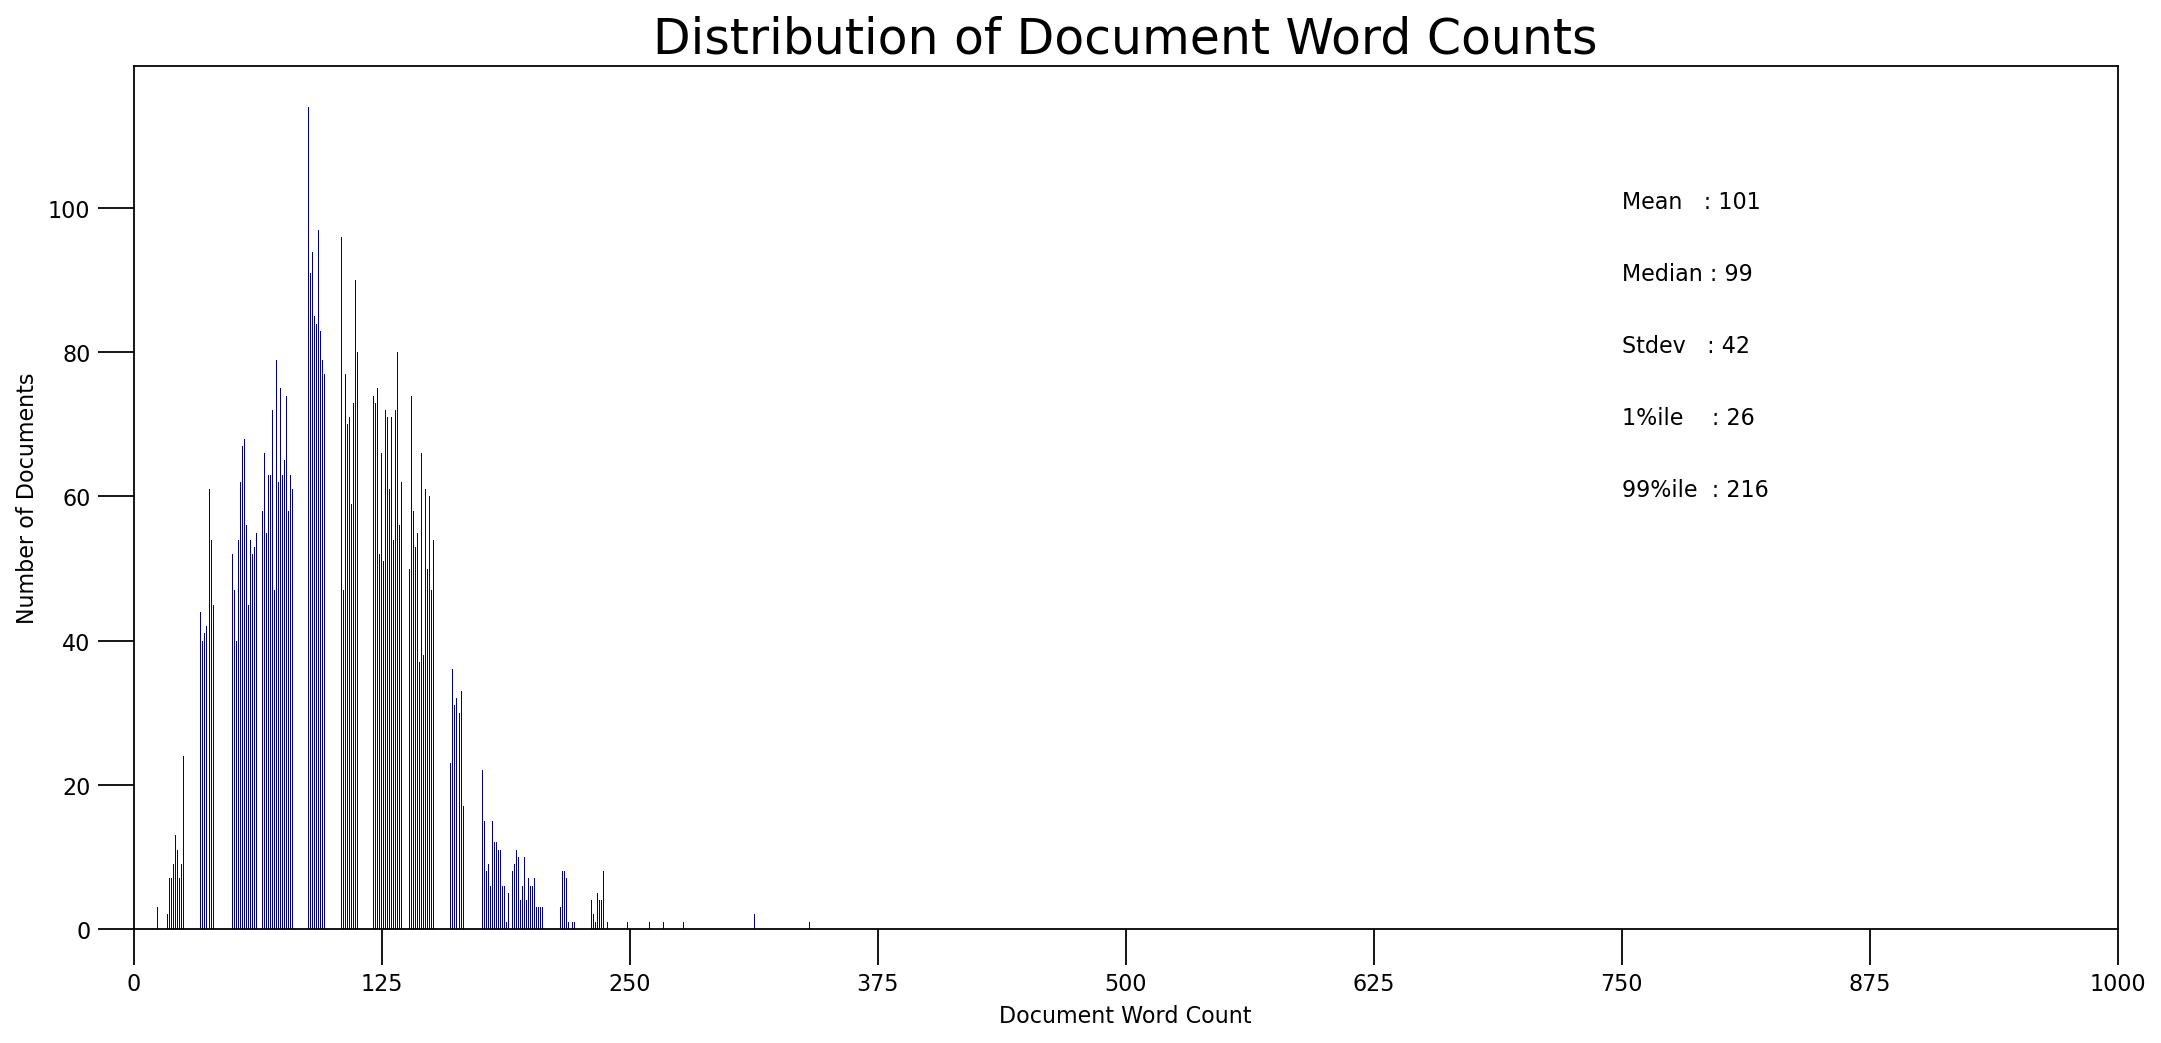

In [209]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

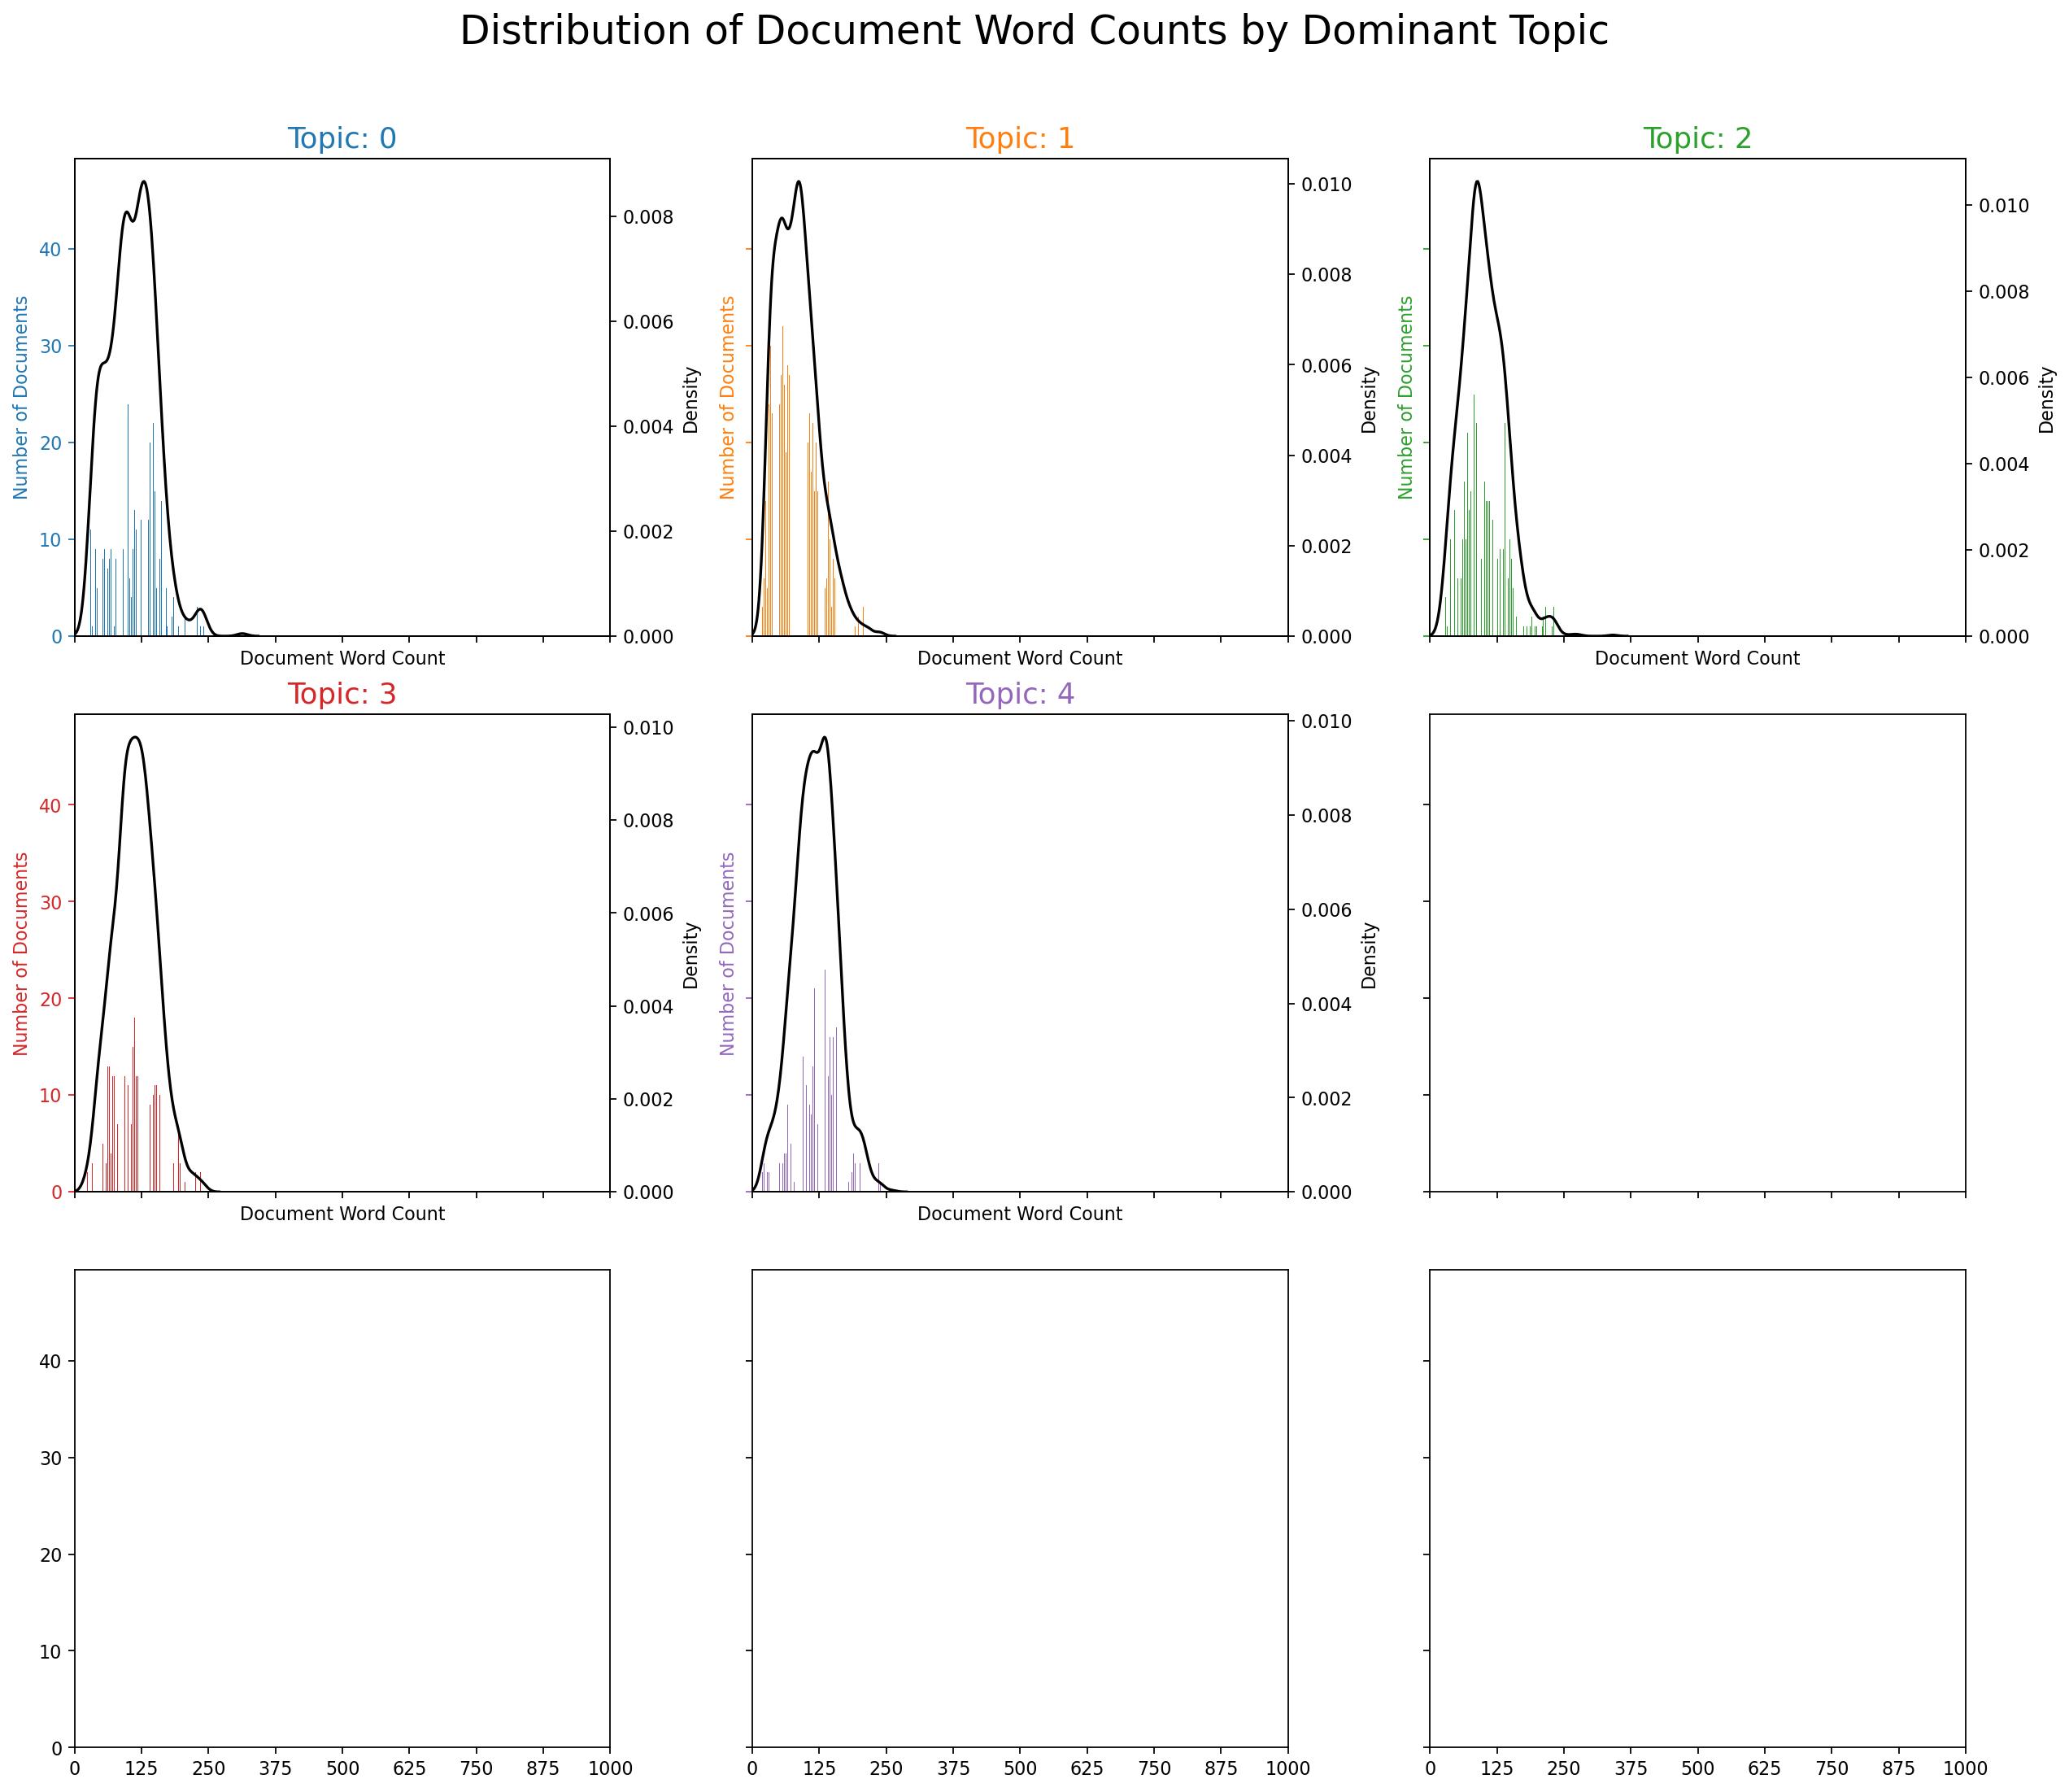

In [210]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i <=4):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

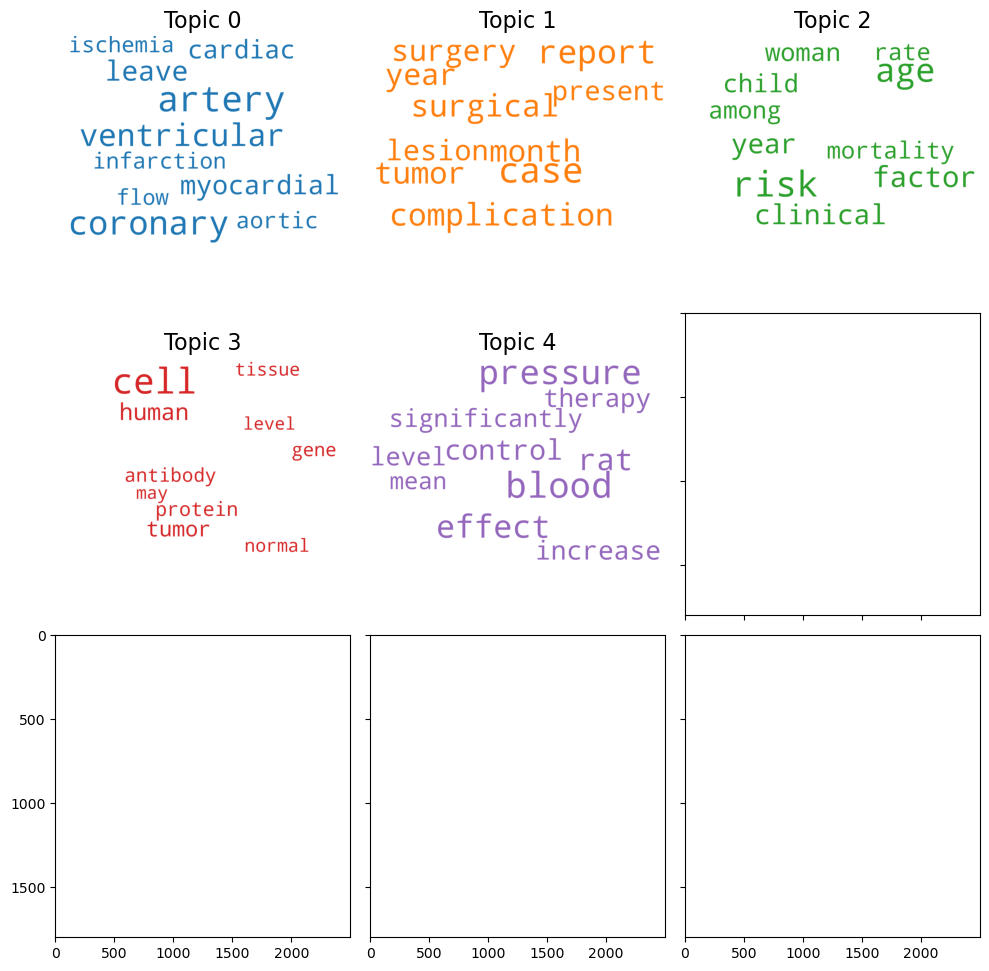

In [211]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i<=4):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

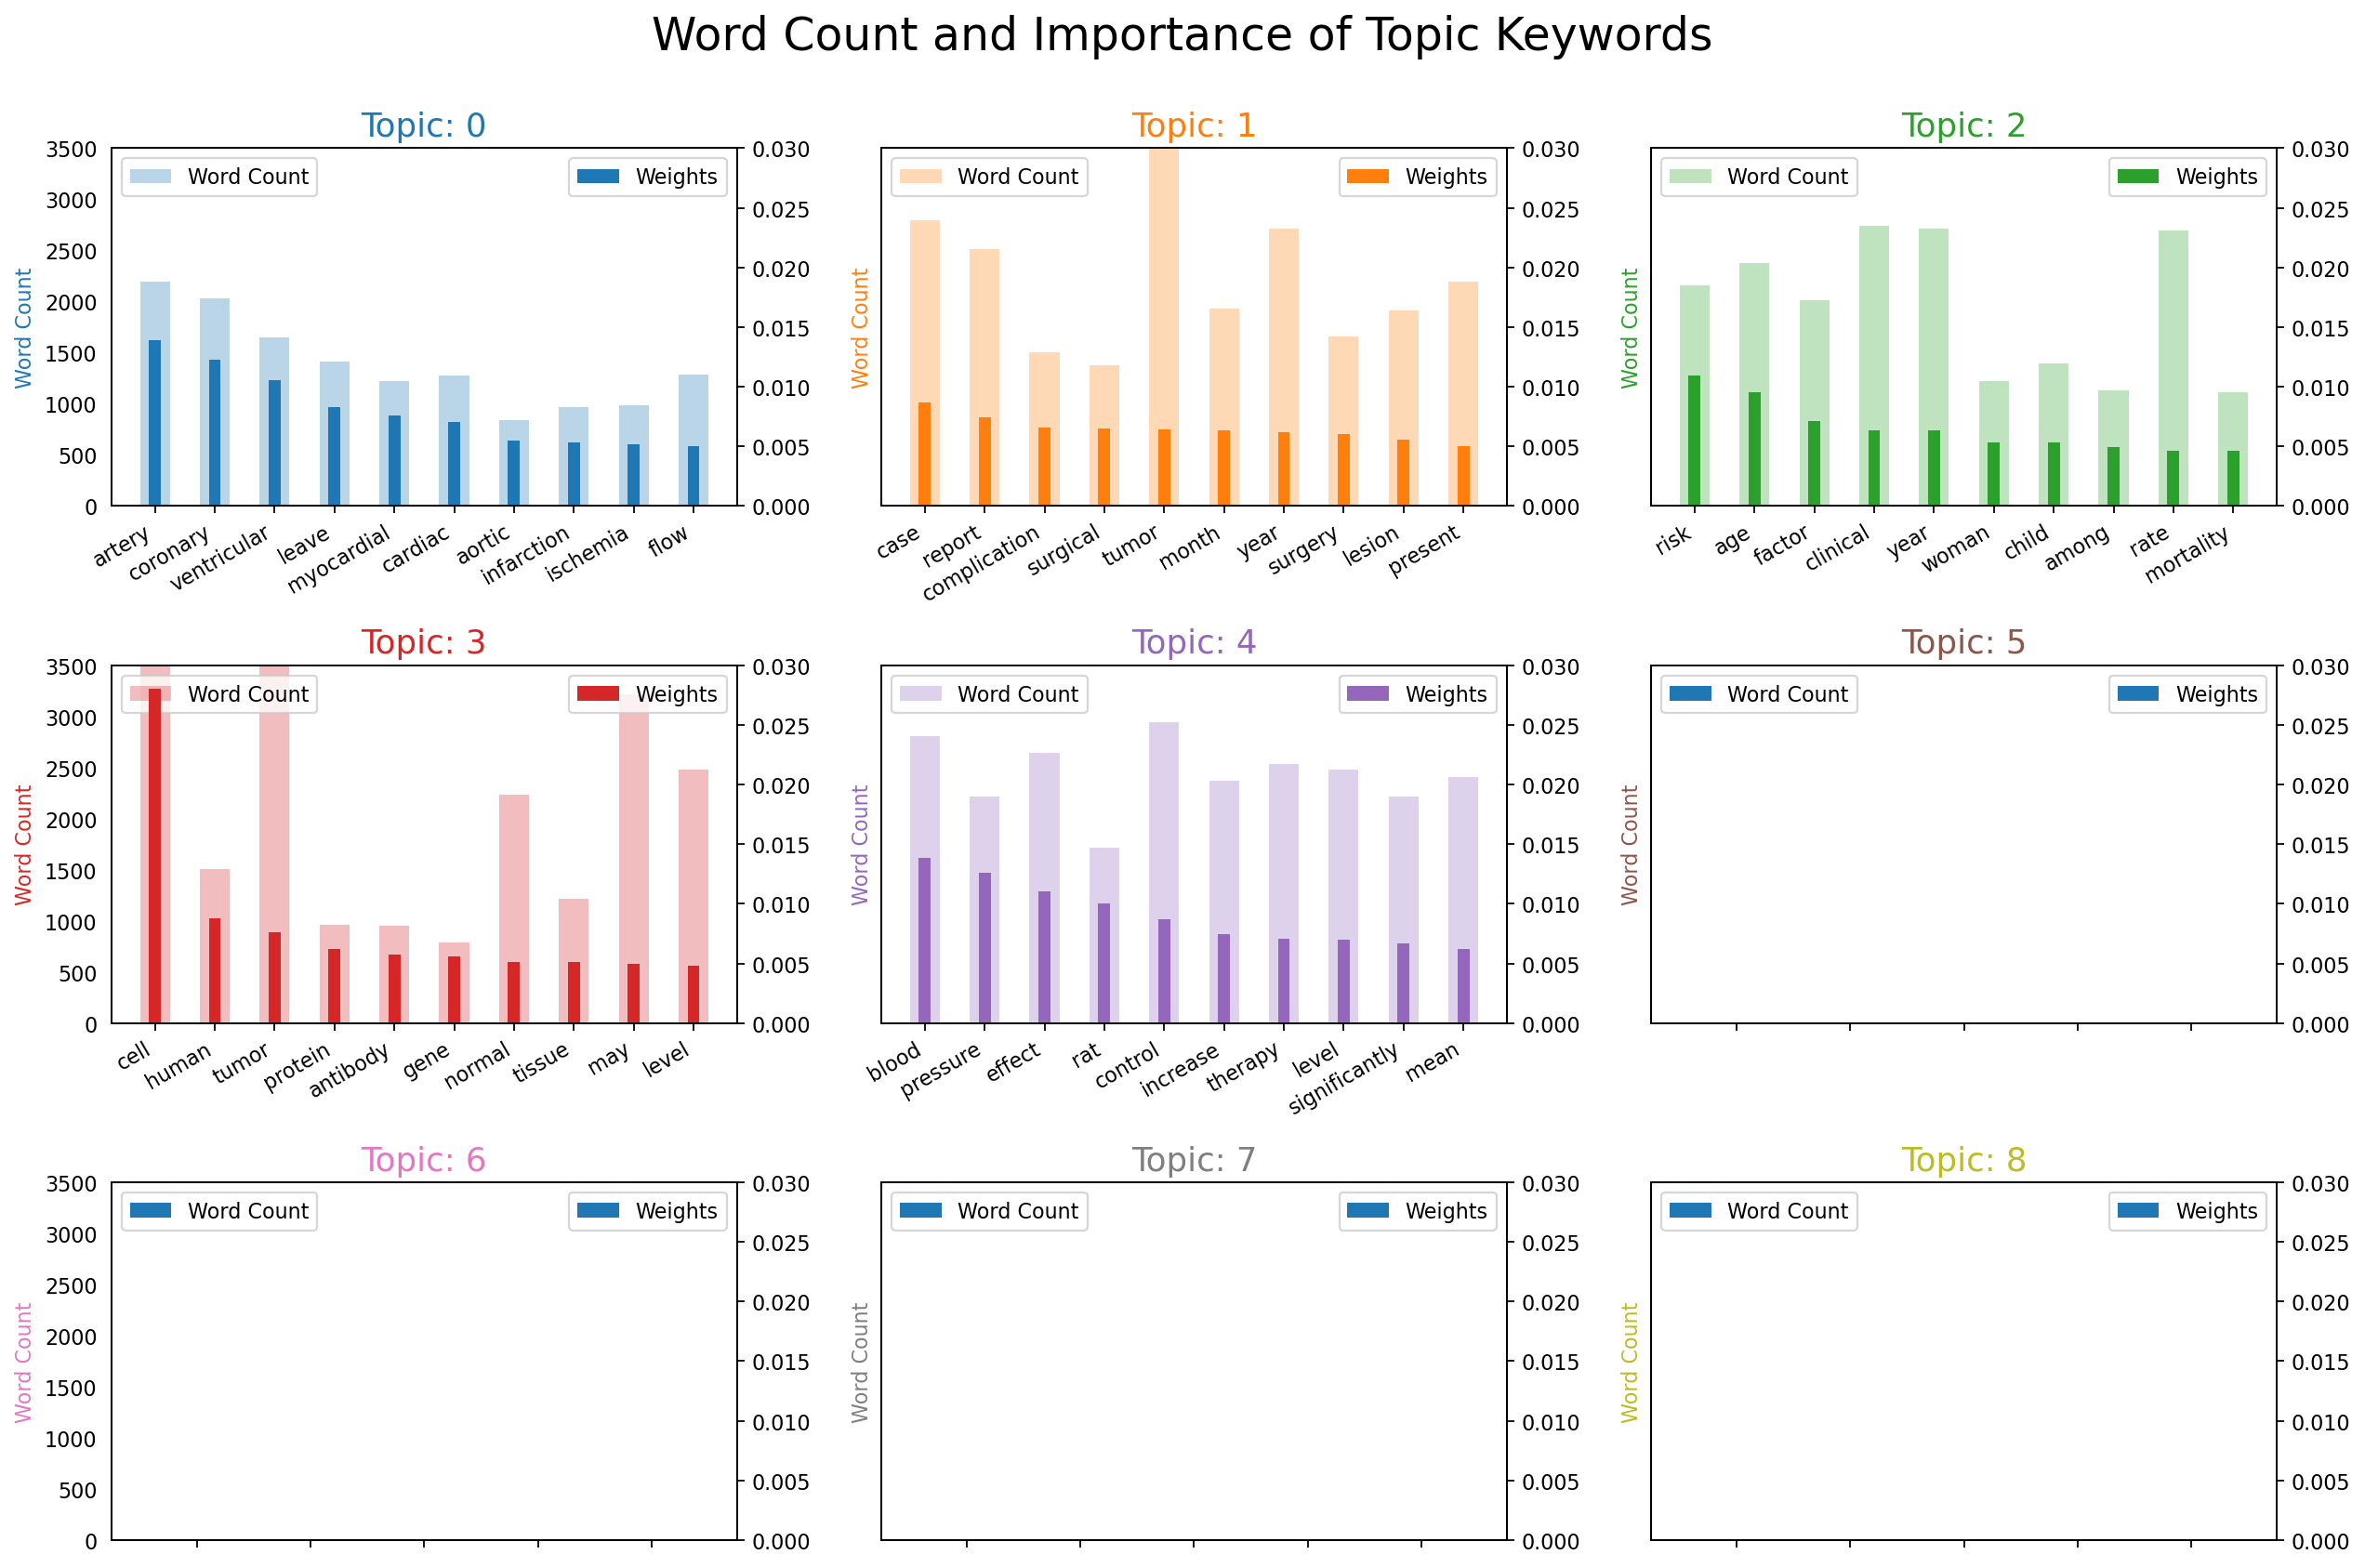

In [212]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df['processed_text'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [213]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
for doc_topics in lda_model.get_document_topics(corpus):
    topic_weights.append([weight for topic_id, weight in doc_topics])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9066 samples in 0.006s...
[t-SNE] Computed neighbors for 9066 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9066
[t-SNE] Computed conditional probabilities for sample 2000 / 9066
[t-SNE] Computed conditional probabilities for sample 3000 / 9066
[t-SNE] Computed conditional probabilities for sample 4000 / 9066
[t-SNE] Computed conditional probabilities for sample 5000 / 9066
[t-SNE] Computed conditional probabilities for sample 6000 / 9066
[t-SNE] Computed conditional probabilities for sample 7000 / 9066
[t-SNE] Computed conditional probabilities for sample 8000 / 9066
[t-SNE] Computed conditional probabilities for sample 9000 / 9066
[t-SNE] Computed conditional probabilities for sample 9066 / 9066
[t-SNE] Mean sigma: 0.000446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.450768
[t-SNE] KL divergence after 1000 iterations: 0.698487


In [214]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [215]:
assignedTopics = []
for document in corpus:
    assigned_topics = lda_model.get_document_topics(document)
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [216]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{1: 0.02029520295202952, 2: 0.07872078720787208, 3: 0.24784747847478475, 4: 0.45694956949569493, 5: 0.1961869618696187}
******* TOPIC 1
{1: 0.32731607629427795, 2: 0.180858310626703, 3: 0.17881471389645776, 4: 0.09979564032697548, 5: 0.21321525885558584}
******* TOPIC 2
{1: 0.11483253588516747, 2: 0.1375598086124402, 3: 0.3283492822966507, 4: 0.19617224880382775, 5: 0.2230861244019139}
******* TOPIC 3
{1: 0.4100765306122449, 2: 0.16454081632653061, 3: 0.15497448979591838, 4: 0.04783163265306122, 5: 0.2225765306122449}
******* TOPIC 4
{1: 0.06896551724137931, 2: 0.2492816091954023, 3: 0.14727011494252873, 4: 0.34913793103448276, 5: 0.1853448275862069}


In [217]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{1: 0.49922077922077923, 3: 0.334025974025974, 4: 0.04987012987012987, 0: 0.017142857142857144, 2: 0.09974025974025974}
******* LABEL 2
{2: 0.1539491298527443, 1: 0.35542168674698793, 4: 0.2322623828647925, 3: 0.17269076305220885, 0: 0.0856760374832664}
******* LABEL 3
{4: 0.10649350649350649, 2: 0.28519480519480517, 3: 0.12623376623376623, 0: 0.20935064935064934, 1: 0.2727272727272727}
******* LABEL 4
{2: 0.1703896103896104, 1: 0.1522077922077922, 4: 0.25246753246753245, 0: 0.38597402597402597, 3: 0.03896103896103896}
******* LABEL 5
{0: 0.1657142857142857, 3: 0.1812987012987013, 1: 0.3251948051948052, 2: 0.19376623376623375, 4: 0.13402597402597402}


In [218]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Clustering

In [47]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [48]:
label_train = df_train.condition_label.values
label_test = df_test.condition_label.values

In [49]:
labels = np.append(label_train, label_test)

In [50]:
unique_labels, category_sizes = np.unique(labels, return_counts=True)

## TF-IDF and LSA

### K-means

In [6]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df_total = pd.concat([df_train, df_test], ignore_index = True)

In [9]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_total["medical_abstract_lemma"])
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

n_samples: 14438, n_features: 40946
0.002


In [10]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [1429 1418 8336 1643 1612]
Number of elements assigned to each cluster: [1940 1225 1514 1271 8488]
Number of elements assigned to each cluster: [1704 1104 5420 2213 3997]
Number of elements assigned to each cluster: [8634 1479 1159 1216 1950]
Number of elements assigned to each cluster: [1633 1663 7477 1357 2308]

True number of documents in each category according to the class labels: [3163 1494 1925 3051 4805]


In [11]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\nwith on tf-idf vectors")

clustering done in 0.53 ± 0.08 s 
Homogeneity: 0.170 ± 0.006
Completeness: 0.200 ± 0.019
V-measure: 0.184 ± 0.011
Adjusted Rand-Index: 0.090 ± 0.008
Silhouette Coefficient: 0.003 ± 0.000


In [12]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=300), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 27.6%


In [13]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=100,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 13.56 ± 0.79 s 
Homogeneity: 0.170 ± 0.000
Completeness: 0.184 ± 0.000
V-measure: 0.177 ± 0.000
Adjusted Rand-Index: 0.097 ± 0.000
Silhouette Coefficient: 0.016 ± 0.001


In [14]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: report case syndrome infection child clinical complication diagnosis present pain 
Cluster 1: coronary artery ventricular myocardial leave cardiac infarction valve heart angioplasty 
Cluster 2: tumor cancer carcinoma survival breast cell metastasis chemotherapy primary stage 
Cluster 3: cell gene human expression protein tumor receptor growth line dna 
Cluster 4: blood pressure rat control hypertension plasma level concentration increase effect 


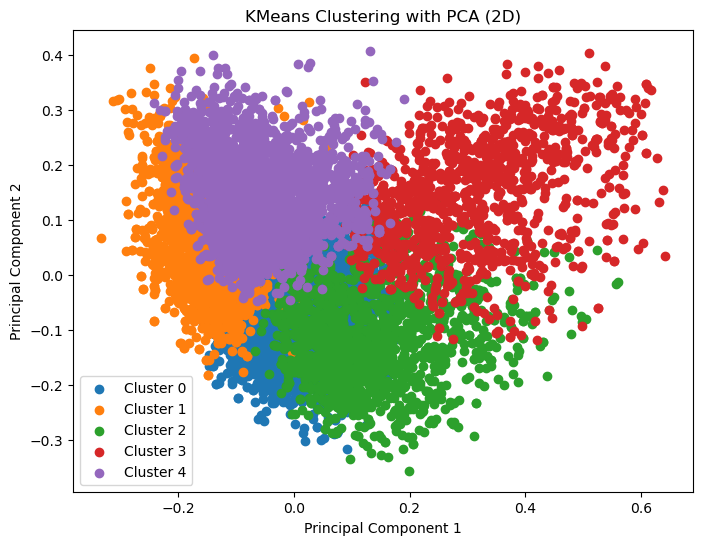

In [15]:
# Apply PCA to reduce dimensionality to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_lsa)

clusters = kmeans.fit_predict(X_lsa)

# Visualize clusters in 2D after PCA
plt.figure(figsize=(8, 6))

for i in range(5):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.title('KMeans Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

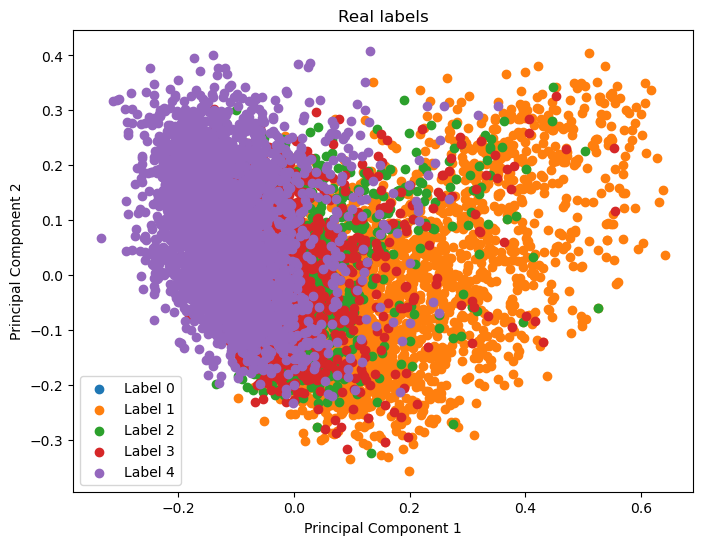

In [16]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_lsa)

clusters = kmeans.fit_predict(X_lsa)

# Visualize clusters in 2D after PCA
plt.figure(figsize=(8, 6))

for i in range(5):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Label {i}')

plt.title('Real labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Agglomerative

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, silhouette_score

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(X_lsa)
y_clus = model.labels_

In [18]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(X_lsa,y_clus)}''')

V measure: 0.12479744629268705
ARI: 0.05813642863707484
Sil.: 0.008277891495034164


## Word2Vec

In [384]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_w2vec.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_w2vec.csv", index_col = 0)

In [385]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

### PCA 3D

In [386]:
from sklearn.decomposition import PCA

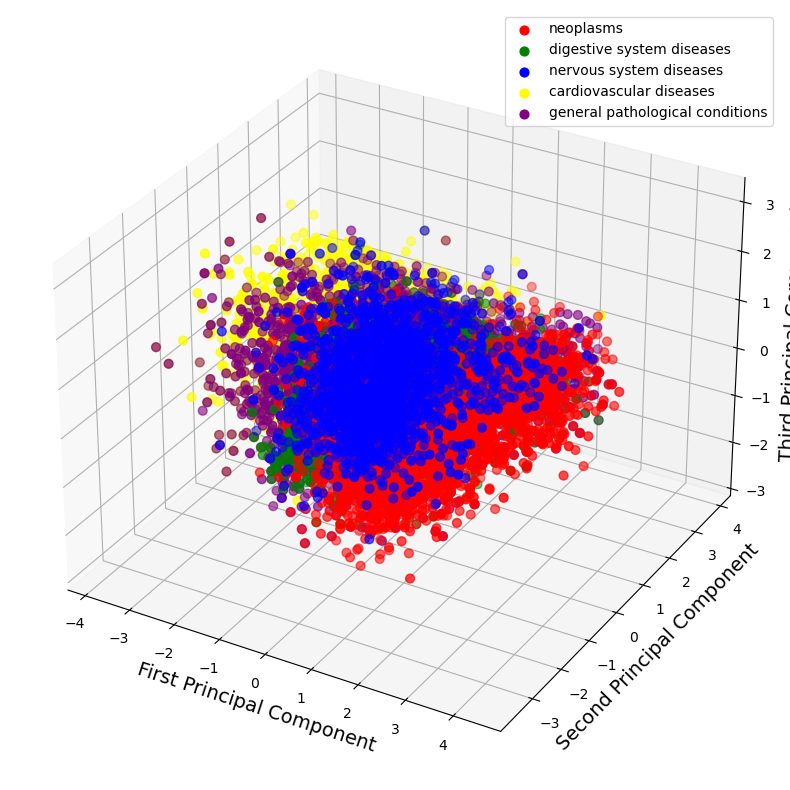

In [387]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [388]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [389]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [390]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, df_total, name="KMeans\nwith on w2vec vectors")

clustering done in 0.08 ± 0.03 s 
Homogeneity: 0.104 ± 0.018
Completeness: 0.100 ± 0.019
V-measure: 0.102 ± 0.019
Adjusted Rand-Index: 0.068 ± 0.013
Silhouette Coefficient: 0.114 ± 0.001


### Agglomerative clustering

In [391]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [392]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.09238271289743574
ARI: 0.04344311405183614
Sil.: 0.07305324691742149


## BERTS

In [94]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_sbert.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_sbert.csv", index_col = 0)

In [95]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

### PCA 3D

In [395]:
from sklearn.decomposition import PCA

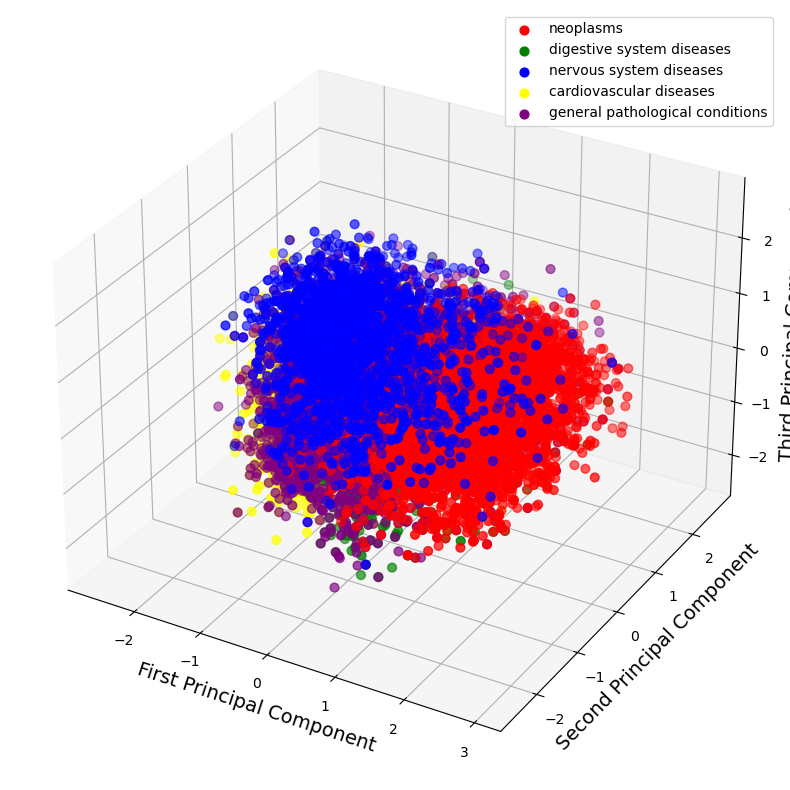

In [396]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [96]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [98]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, df_total, name="KMeans\nwith on BERTs vectors")

clustering done in 0.15 ± 0.02 s 
Homogeneity: 0.234 ± 0.001
Completeness: 0.223 ± 0.001
V-measure: 0.228 ± 0.001
Adjusted Rand-Index: 0.185 ± 0.001
Silhouette Coefficient: 0.034 ± 0.000


In [99]:
assigned_clusters = kmeans.labels_

In [100]:
assigned_clusters

array([2, 2, 2, ..., 1, 2, 3])

In [101]:
# Count occurrences of each unique value
unique, counts = np.unique(assigned_clusters, return_counts=True)

# Calculate relative frequencies
relative_frequencies = counts / len(assigned_clusters)

# Display results
for value, freq in zip(unique, relative_frequencies):
    print(f"Cluster {value}: Relative Frequency {freq:.2f}")

Cluster 0: Relative Frequency 0.18
Cluster 1: Relative Frequency 0.21
Cluster 2: Relative Frequency 0.18
Cluster 3: Relative Frequency 0.24
Cluster 4: Relative Frequency 0.18


In [102]:
# Count occurrences of each unique value
unique, counts = np.unique(labels, return_counts=True)

# Calculate relative frequencies
relative_frequencies = counts / len(labels)

# Display results
for value, freq in zip(unique, relative_frequencies):
    print(f"Label {value}: Relative Frequency {freq:.2f}")

Label 1: Relative Frequency 0.22
Label 2: Relative Frequency 0.10
Label 3: Relative Frequency 0.13
Label 4: Relative Frequency 0.21
Label 5: Relative Frequency 0.33


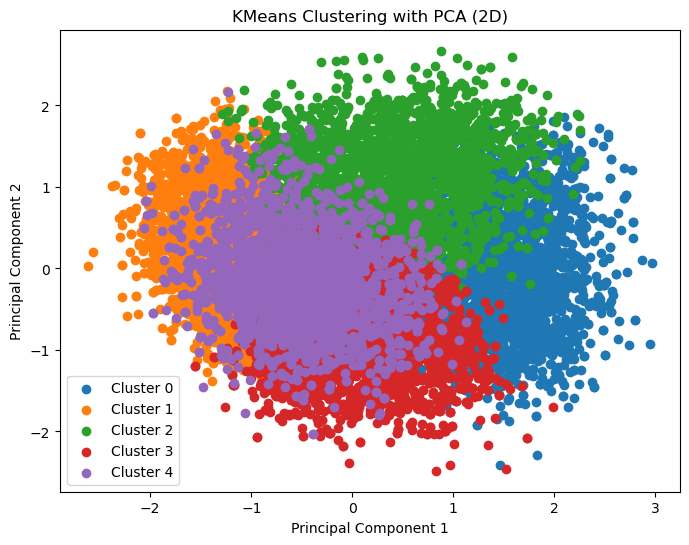

In [404]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_total)

assigned_clusters = kmeans.labels_

# Visualize clusters in 2D after PCA
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(X_pca[assigned_clusters == cluster_id, 0], X_pca[assigned_clusters == cluster_id, 1], label=f'Cluster {cluster_id}')
plt.title('KMeans Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

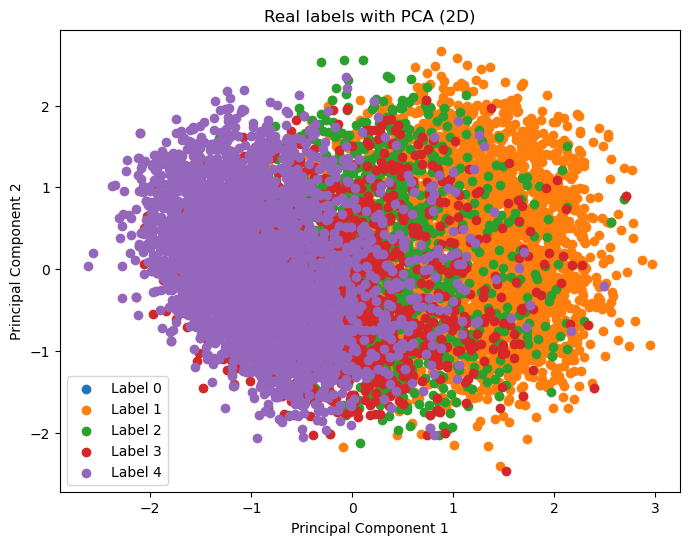

In [405]:
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(X_pca[labels == cluster_id, 0], X_pca[labels == cluster_id, 1], label=f'Label {cluster_id}')
plt.title('Real labels with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [103]:
clusters = kmeans.labels_

In [104]:
# Get most frequent words within each cluster
clustered_words = {i: [] for i in range(5)}
for i, sentence in enumerate(sentences):
    words = sentence.split()  # Split sentence into words
    clustered_words[clusters[i]].extend(words)

# Calculate most frequent words for each cluster
most_common_words_per_cluster = {}
for cluster_id, words in clustered_words.items():
    word_counts = Counter(words)
    most_common_words_per_cluster[cluster_id] = word_counts.most_common(10)  

# Display most frequent words for each cluster
for cluster_id, common_words in most_common_words_per_cluster.items():
    print(f"Cluster {cluster_id} - Most common words:")
    for word, count in common_words:
        print(f"{word}: {count} times")
    print()

Cluster 0 - Most common words:
tumor: 4494 times
cancer: 3224 times
cell: 2825 times
carcinoma: 2535 times
case: 1321 times
survival: 1304 times
breast: 1114 times
primary: 1108 times
therapy: 1094 times
year: 1067 times

Cluster 1 - Most common words:
coronary: 3183 times
ventricular: 2715 times
pressure: 2570 times
blood: 2435 times
heart: 2414 times
artery: 2384 times
myocardial: 1929 times
cardiac: 1917 times
leave: 1732 times
rate: 1619 times

Cluster 2 - Most common words:
cell: 4238 times
human: 1321 times
infection: 1178 times
protein: 1162 times
liver: 1128 times
serum: 1119 times
control: 1019 times
normal: 1009 times
level: 1008 times
result: 1008 times

Cluster 3 - Most common words:
case: 1423 times
complication: 1416 times
report: 1276 times
surgery: 1260 times
surgical: 1176 times
result: 1148 times
year: 1113 times
use: 1060 times
rate: 1017 times
procedure: 1009 times

Cluster 4 - Most common words:
control: 1057 times
age: 1014 times
syndrome: 1011 times
cerebral: 921

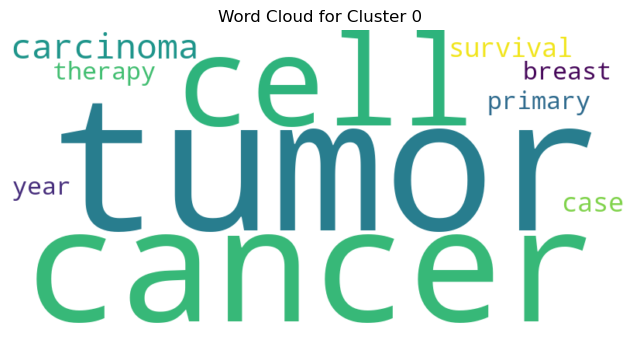

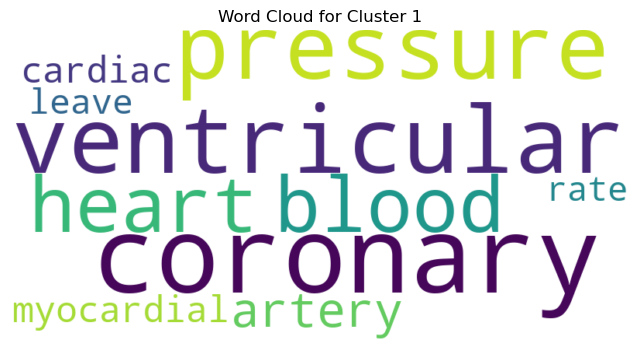

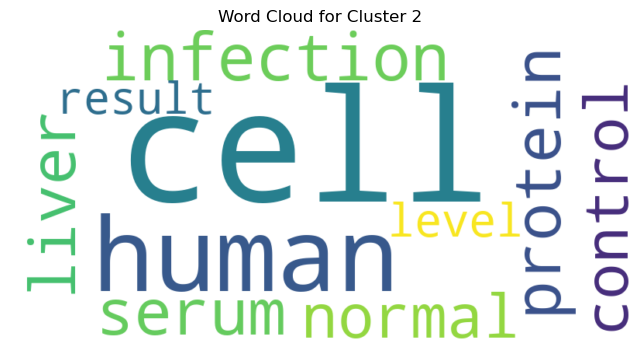

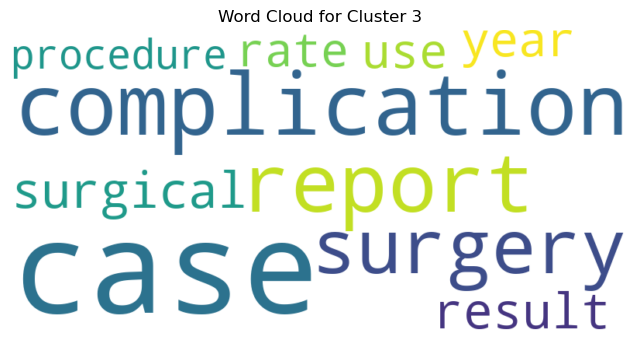

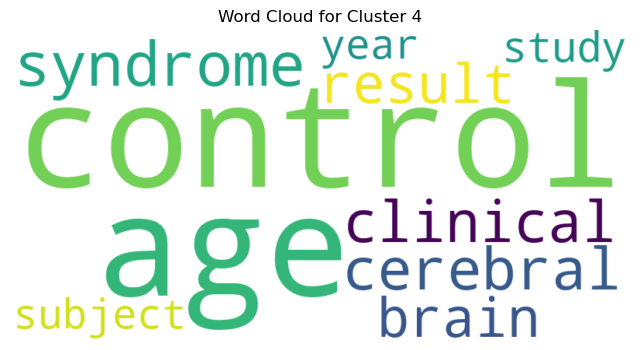

In [105]:

from wordcloud import WordCloud# Create word cloud for each cluster
for cluster_id, common_words in most_common_words_per_cluster.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()

In [106]:
# Calculate percentage of real label in each cluster
from collections import Counter

def percentage_real_label_in_clusters(true_labels, clustered_labels, cluster_num):
    cluster_indices = [i for i, label in enumerate(clustered_labels) if label == cluster_num]
    true_labels_in_cluster = [true_labels[i] for i in cluster_indices]
    label_counts = Counter(true_labels_in_cluster)
    total_samples = len(true_labels_in_cluster)
    percentages = {label: count / total_samples * 100 for label, count in label_counts.items()}
    return percentages

In [107]:
for cluster_num in range(5):
    percentages_cluster= percentage_real_label_in_clusters(labels, assigned_clusters, cluster_num)
    print(f"Percentage of real labels in cluster {cluster_num}:")
    for label, percentage in percentages_cluster.items():
        print(f"Label {label}: {percentage:.2f}%")

Percentage of real labels in cluster 0:
Label 1: 74.68%
Label 3: 3.92%
Label 2: 4.46%
Label 4: 1.65%
Label 5: 15.29%
Percentage of real labels in cluster 1:
Label 5: 28.33%
Label 4: 64.00%
Label 2: 2.01%
Label 1: 1.04%
Label 3: 4.61%
Percentage of real labels in cluster 2:
Label 5: 39.49%
Label 1: 25.76%
Label 2: 20.31%
Label 3: 6.81%
Label 4: 7.63%
Percentage of real labels in cluster 3:
Label 3: 8.67%
Label 2: 19.94%
Label 4: 16.41%
Label 5: 44.38%
Label 1: 10.60%
Percentage of real labels in cluster 4:
Label 3: 45.51%
Label 4: 10.13%
Label 5: 35.99%
Label 2: 3.26%
Label 1: 5.12%


In [108]:
# Function to plot a pie chart for percentage of real labels in a cluster
def plot_pie_chart(percentages, cluster_num):
    label_map = {
    1: "Neoplasms",
    2: "Digestive system diseases",
    3: "Nervous system diseases",
    4: "Cardiovascular diseases",
    5: "General pathological conditions",
    }
    label_colors = {
    "Neoplasms": 'firebrick',
    "Digestive system diseases": 'blue',
    "Nervous system diseases": 'green',
    "Cardiovascular diseases": 'orange'   ,
    "General pathological conditions":'purple'
    # Add more labels and their respective colors as needed
    }
    #colors = ['firebrick', 'blue', 'green', 'orange', 'purple']  # Example colors
    labels = [label_map[label] for label in percentages.keys()]
    # Retrieve colors based on labels
    colors = [label_colors[label] for label in labels]
    sizes = list(percentages.values())
    plt.figure(figsize=(8, 6))
    patches, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of real labels in cluster {cluster_num+1}")
    custom_labels = [f'{label} ({sizes[i]:.2f}%)' for i, label in enumerate(labels)]
    plt.legend(patches, custom_labels, loc="best", fontsize='small')
    plt.axis('equal')

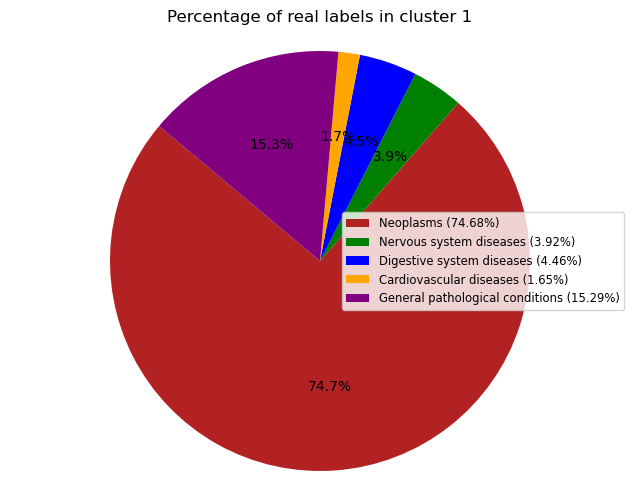

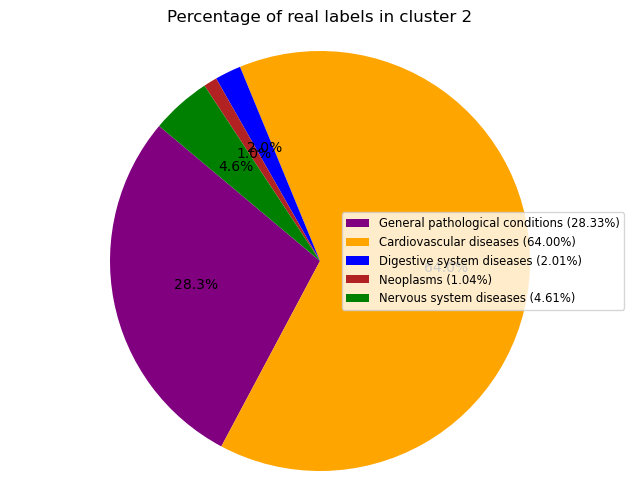

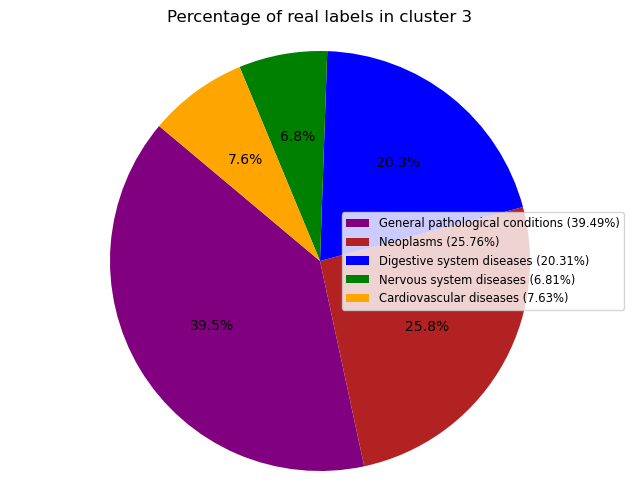

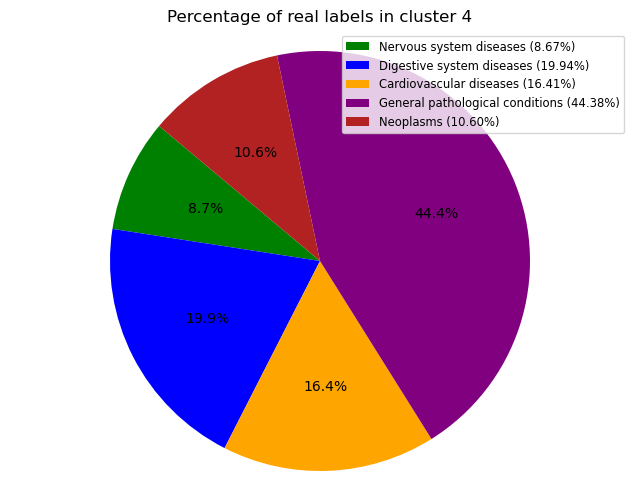

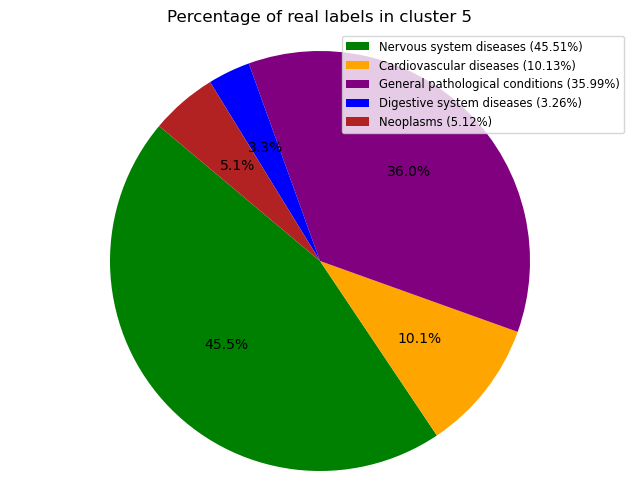

In [109]:
for cluster_num in range(5):
    percentages_cluster = percentage_real_label_in_clusters(labels, clusters, cluster_num)
    plot_pie_chart(percentages_cluster, cluster_num)

### Agglomerative clustering

In [409]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [410]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.18767541804071666
ARI: 0.13153737224491735
Sil.: 0.009984481561747896
